In [1]:
#Get the working directory

import os
os.getcwd()

#Change the working directory and confirm it changed to where you want it to be!

os.chdir('C:\\Users\\mcboe72\\My Documents')
os.getcwd()


'C:\\Users\\mcboe72\\My Documents'

In [2]:
#Import packages, including, pandas and use pd.read_csv to import data
#Use head fucntion to return first rows of data to confirm correctly imported

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='brun0326', api_key='Jaf9d31V3Ji8xNWwT2GG')

from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

PARAMETERS = pd.read_csv('Offer Parameters 2017.csv')
PARAMETERS.head()
COLUMNS=list(PARAMETERS)


In [3]:
PEER_GROUPS=list(PARAMETERS['PEER_GROUP_DESC'].unique())
PEER_GROUPS

['WIND',
 'GAS_AERO',
 'GAS_CC',
 'COAL_OLDER_LARGER',
 'GAS_CT_NEWER_LARGER',
 'HYDRO',
 'COAL_NEWER',
 'OTHER',
 'NUCLEAR',
 'OIL',
 'GAS_CT_NEWER_SMALLER',
 'COAL_OLDER_SMALLER',
 'GAS_ST_SMALLER',
 nan,
 'GAS_CT_OLDER_SMALLER',
 'GAS_IC_SMALLER',
 'GAS_CT_OLDER_LARGER',
 'GAS_ST_LARGER']

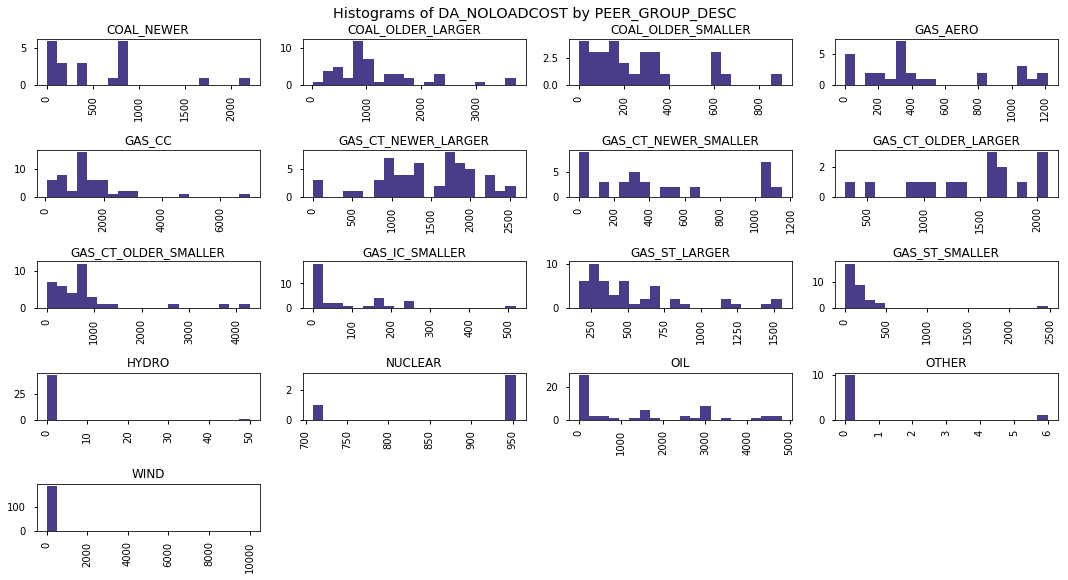

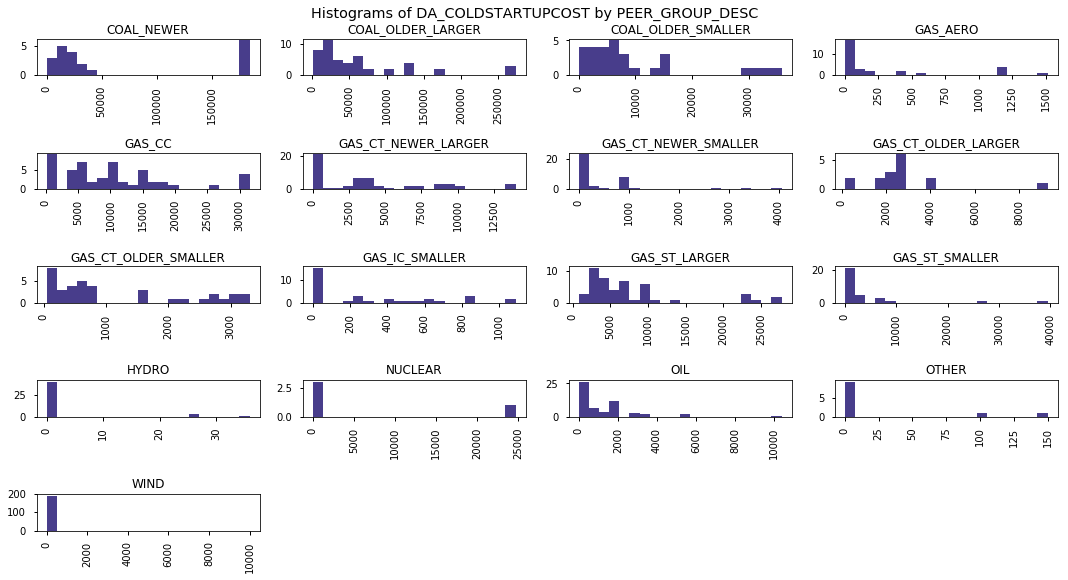

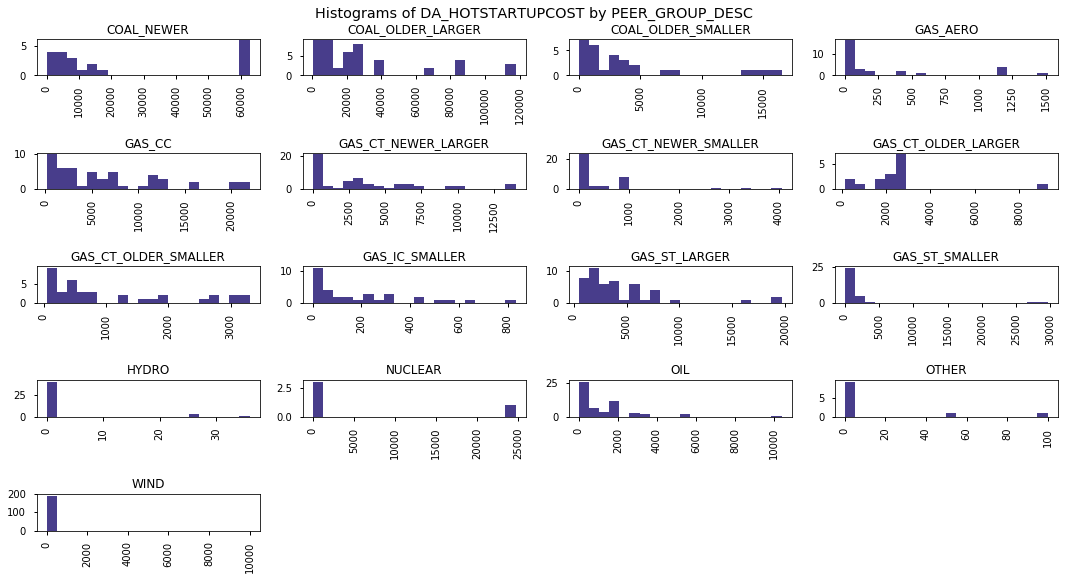

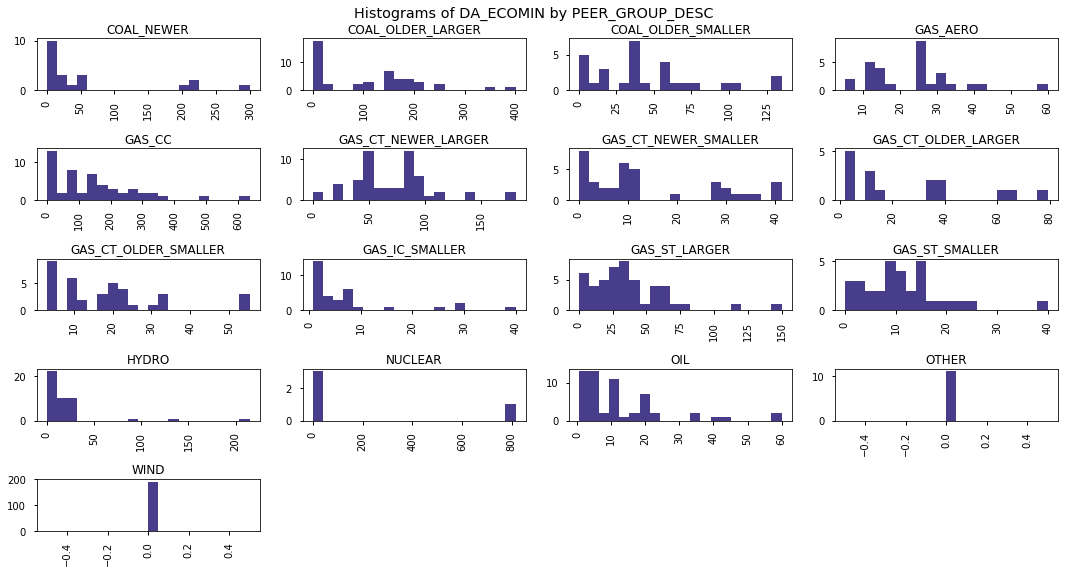

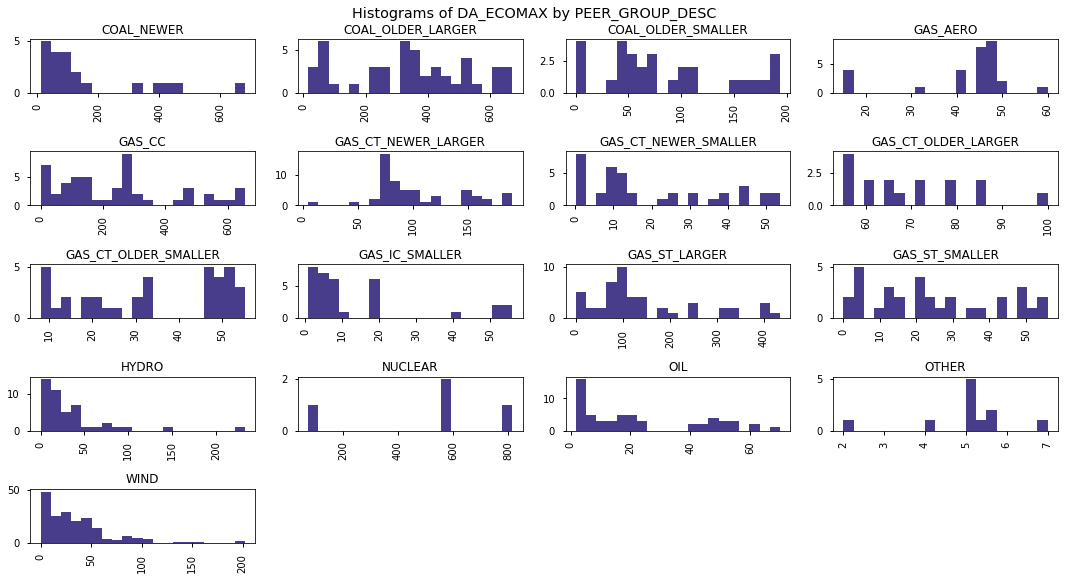

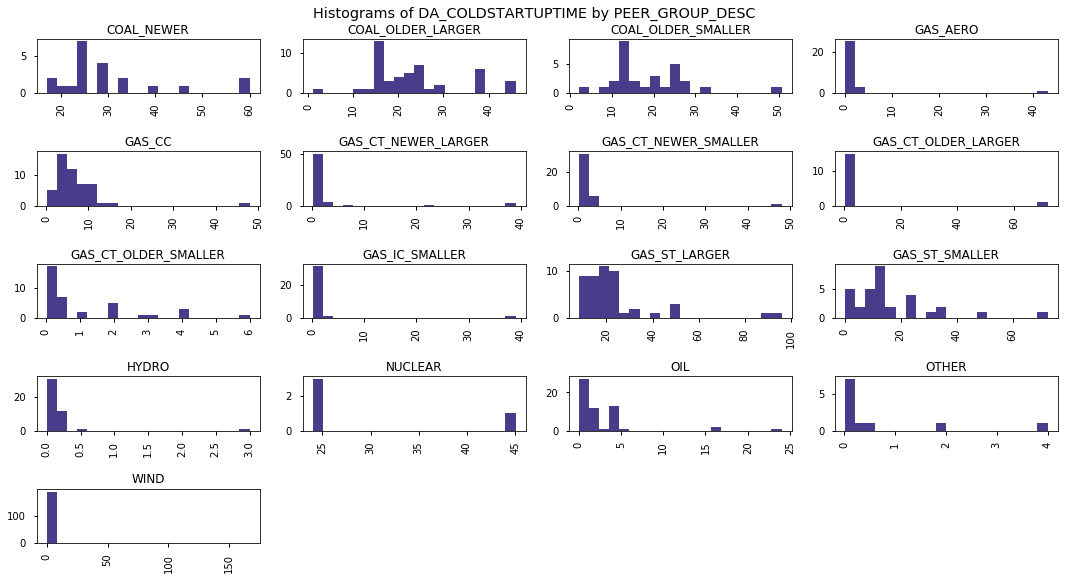

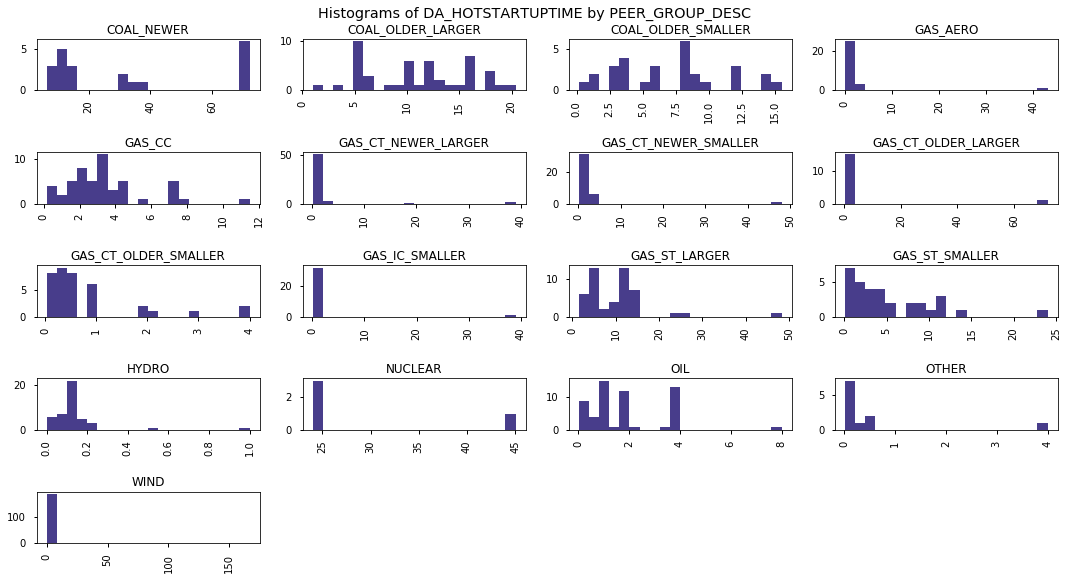

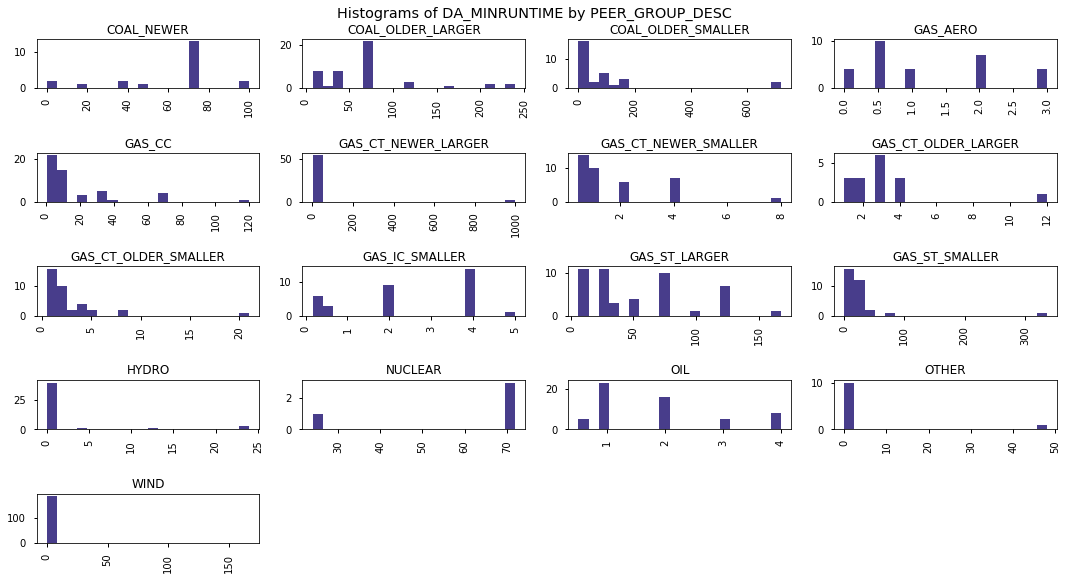

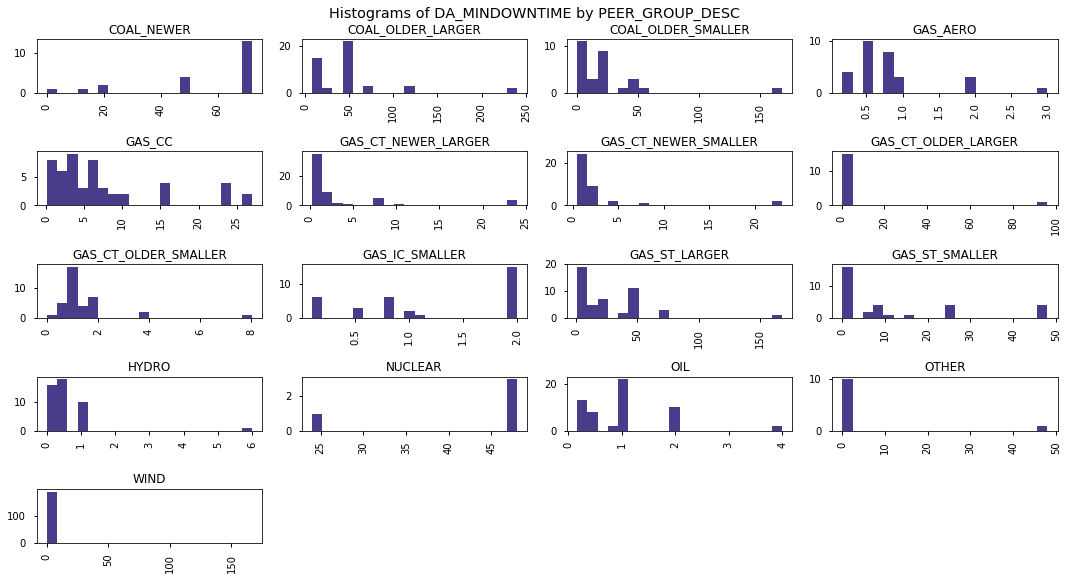

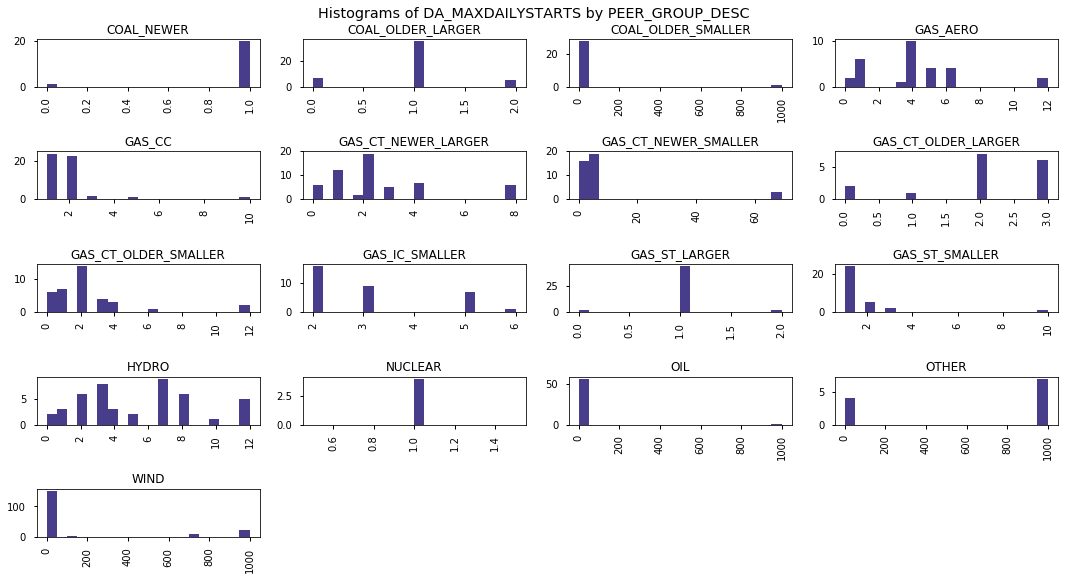

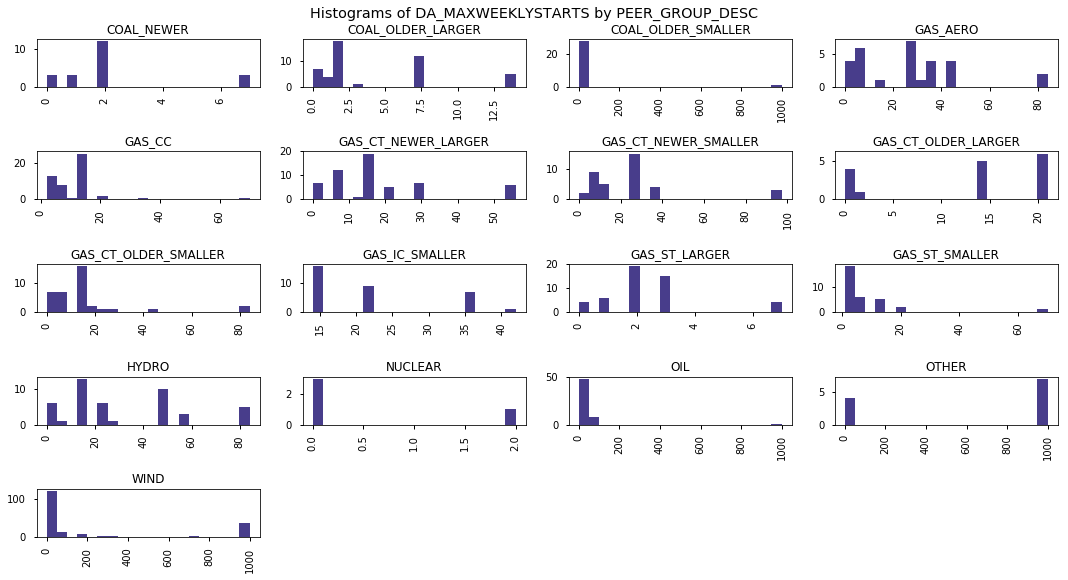

In [4]:

MONTHLY=PARAMETERS[PARAMETERS['YEAR_MONTH']=='2017-12']

sns.set_context('notebook',font_scale=1)


PARAMS = ['DA_NOLOADCOST','DA_COLDSTARTUPCOST','DA_HOTSTARTUPCOST','DA_ECOMIN','DA_ECOMAX','DA_COLDSTARTUPTIME',
          'DA_HOTSTARTUPTIME', 'DA_MINRUNTIME','DA_MINDOWNTIME','DA_MAXDAILYSTARTS','DA_MAXWEEKLYSTARTS']

def HISTOGRAM_LOOP(data,groupby):
    for parameter in PARAMS:
        data[parameter].hist(figsize=(15,8),by=data[groupby], bins=20, color='darkslateblue')
        plt.tight_layout()
        plt.suptitle("Histograms of " + parameter + " by " + groupby, verticalalignment='bottom', horizontalalignment='center')
        plt.show() 

HISTOGRAM_LOOP(MONTHLY,'PEER_GROUP_DESC')

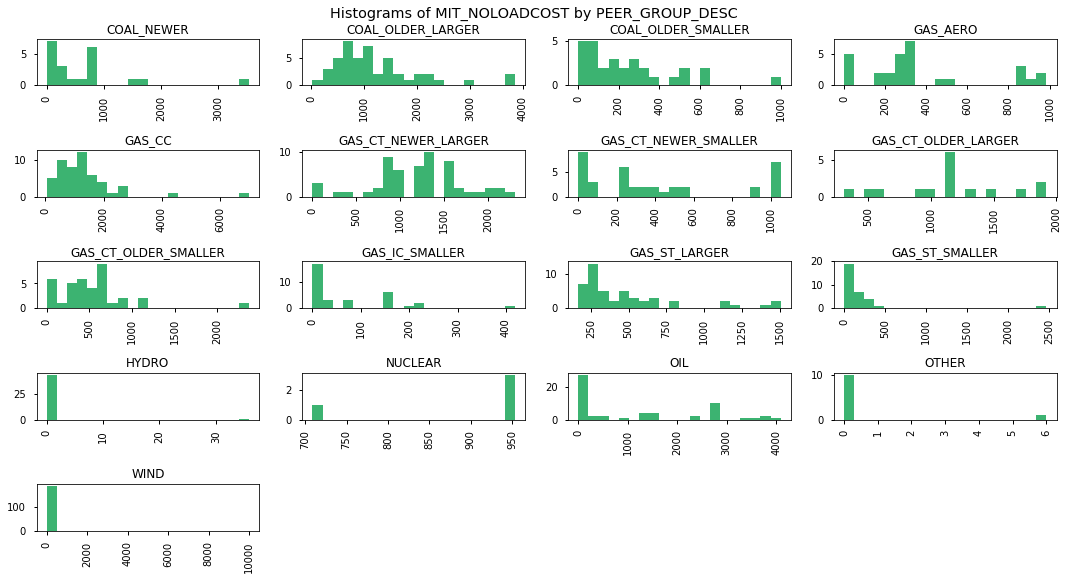

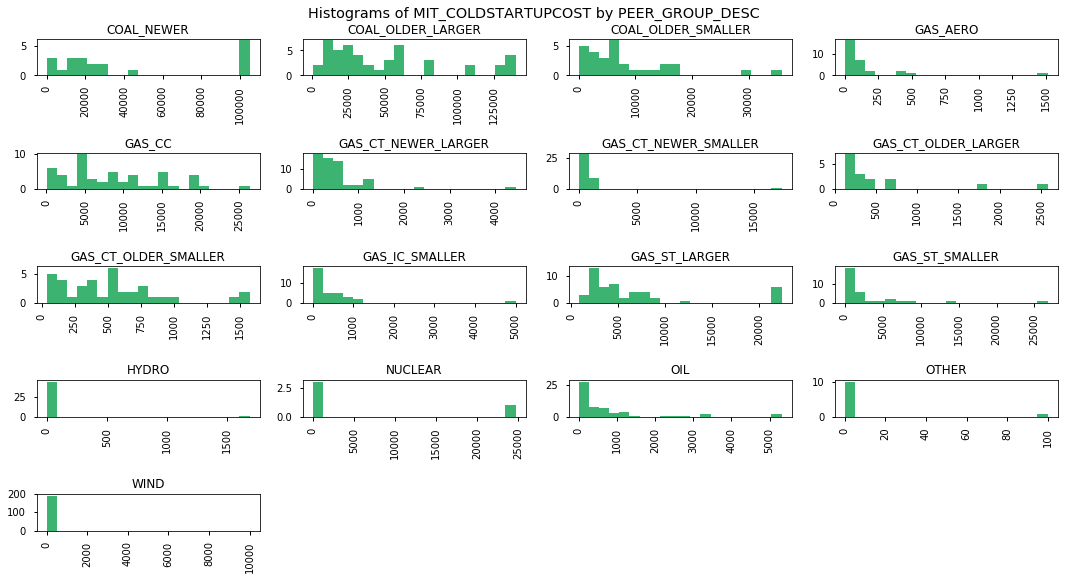

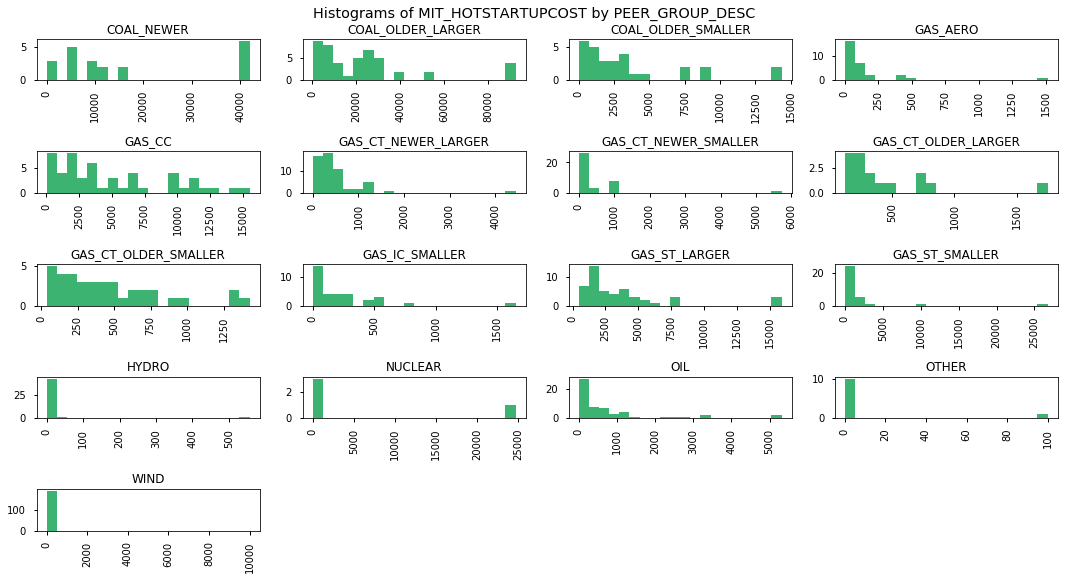

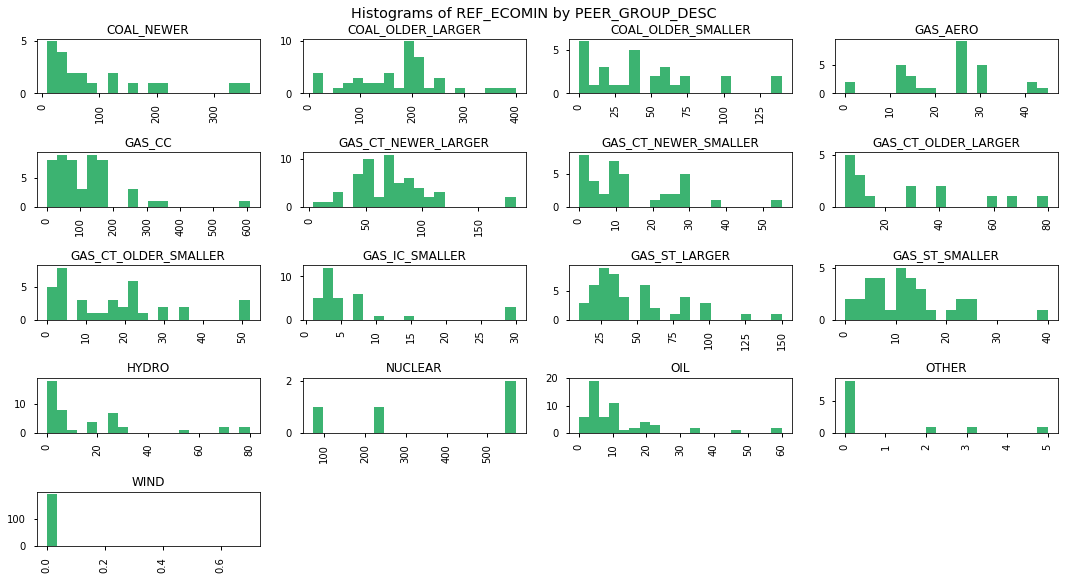

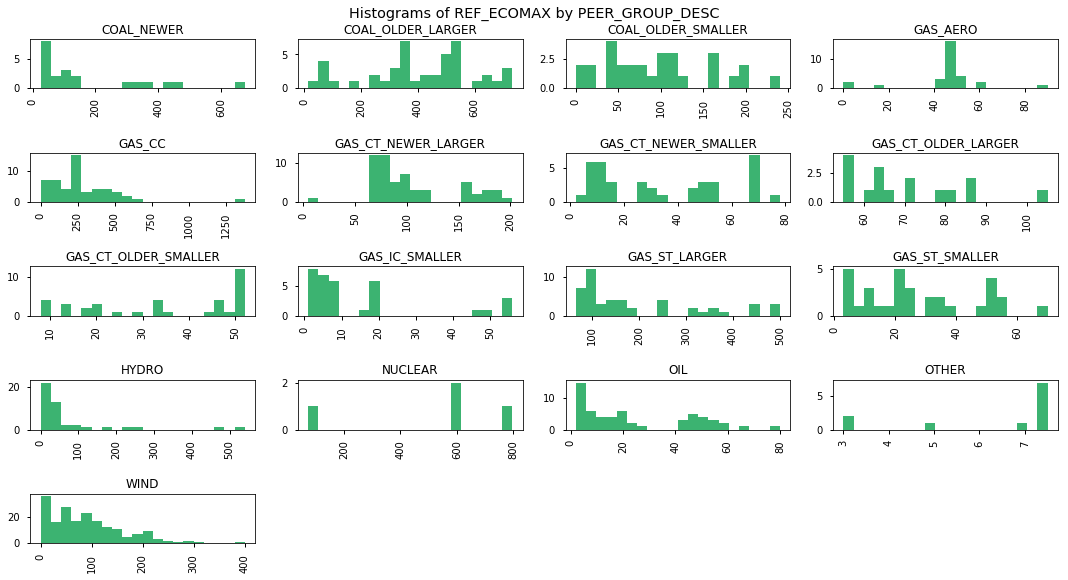

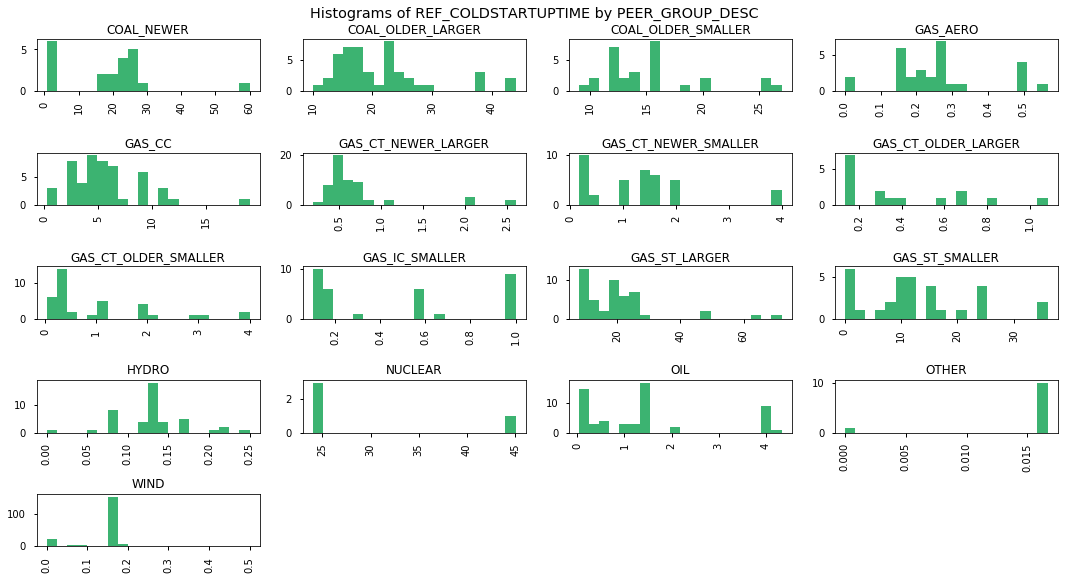

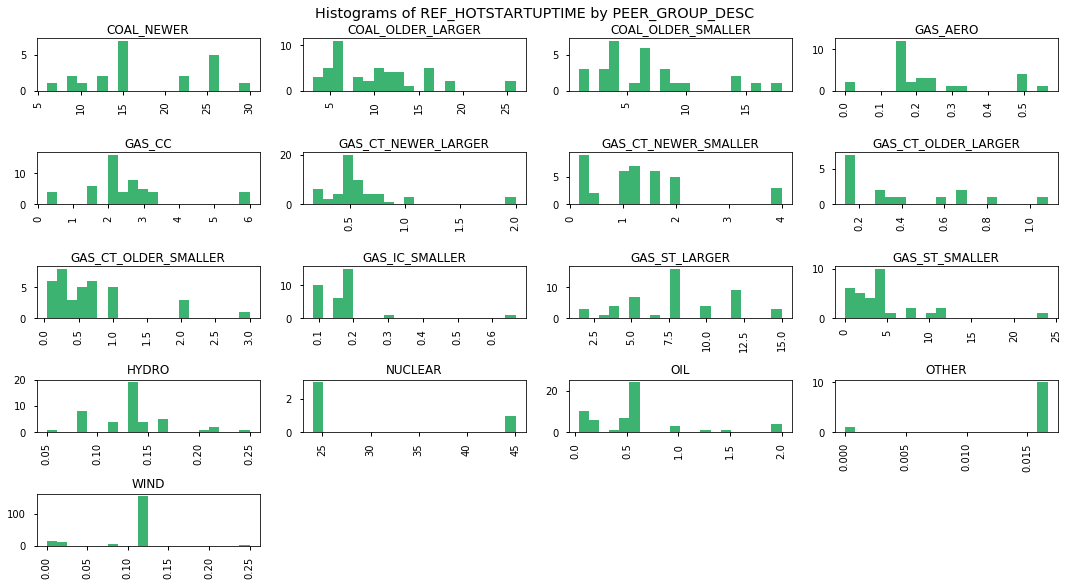

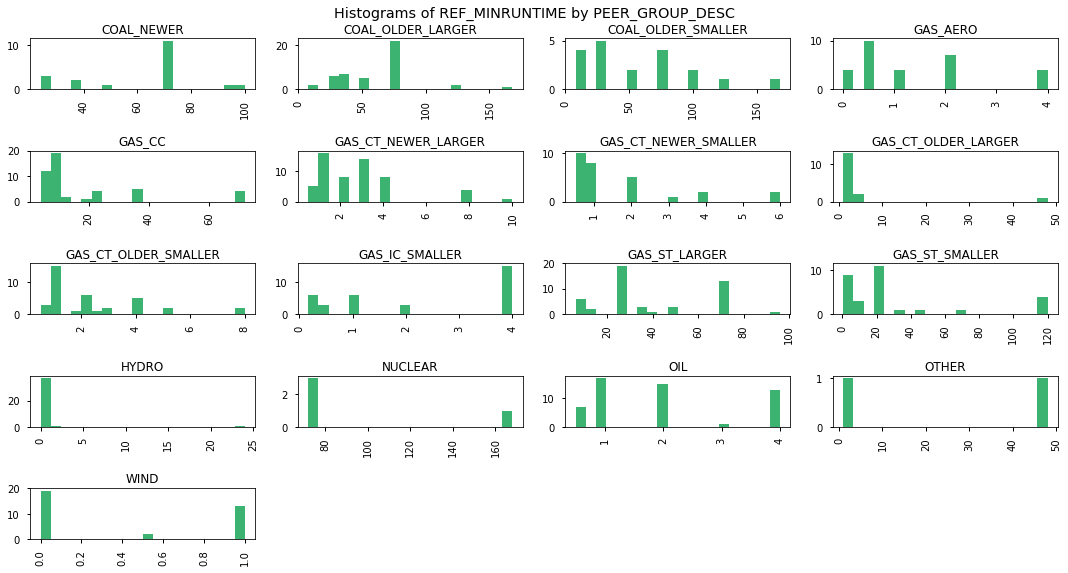

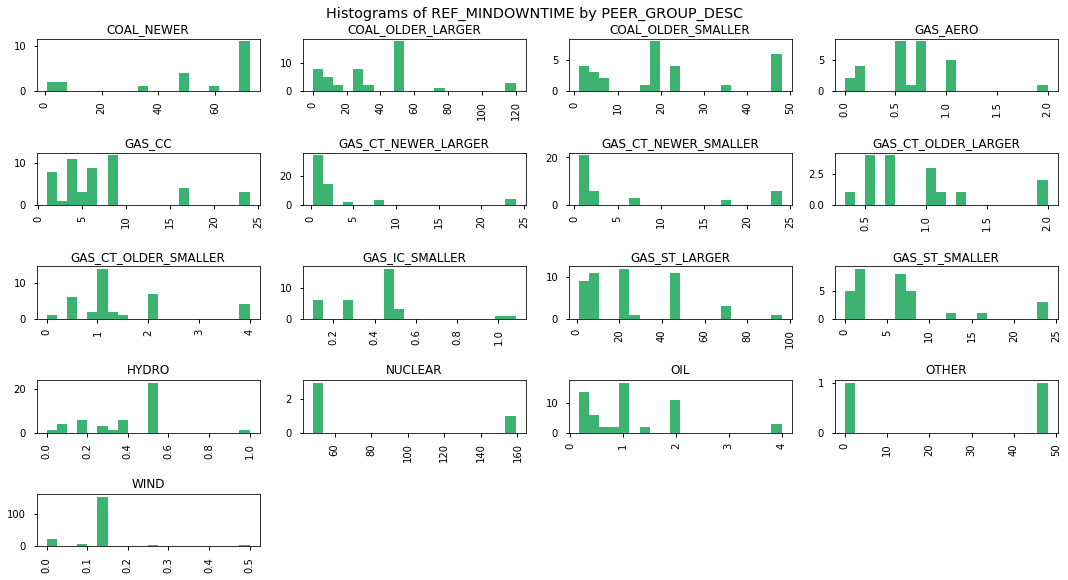

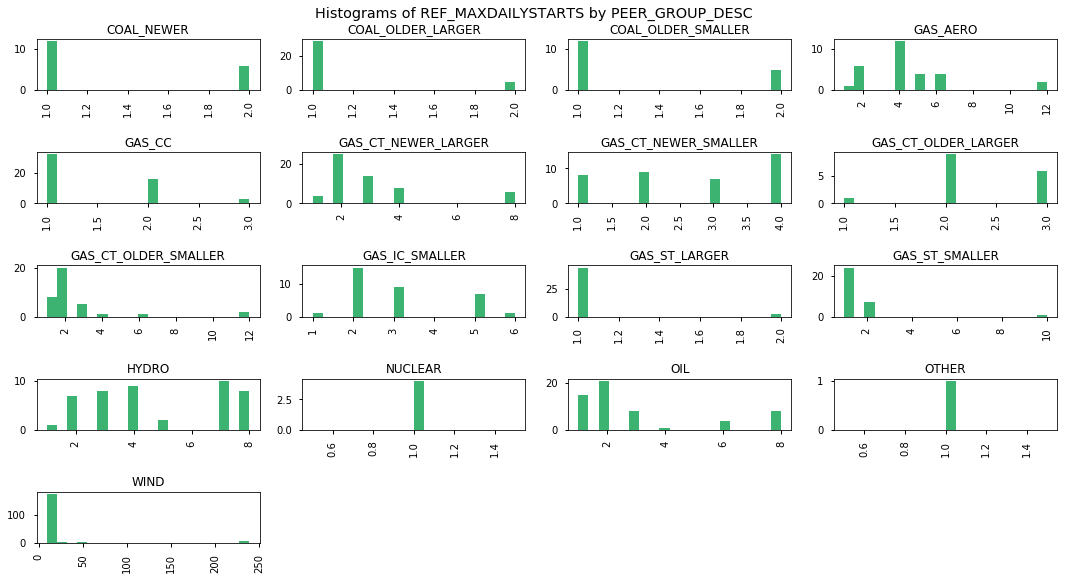

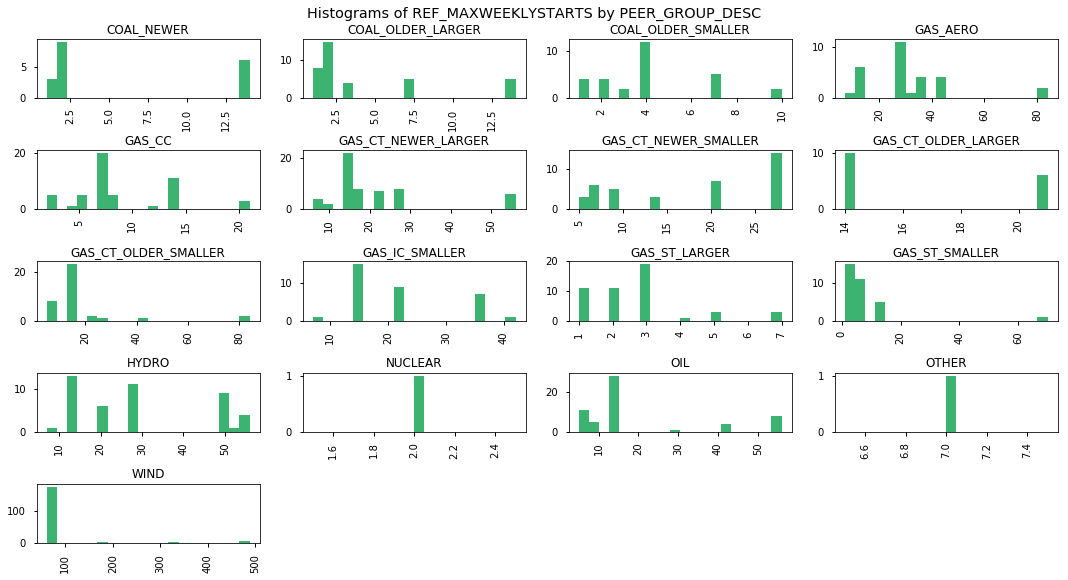

In [67]:


sns.set_context('notebook',font_scale=1)


REF_PARAMS = ['MIT_NOLOADCOST','MIT_COLDSTARTUPCOST','MIT_HOTSTARTUPCOST','REF_ECOMIN','REF_ECOMAX','REF_COLDSTARTUPTIME',
          'REF_HOTSTARTUPTIME', 'REF_MINRUNTIME','REF_MINDOWNTIME','REF_MAXDAILYSTARTS','REF_MAXWEEKLYSTARTS']

def HISTOGRAM_LOOP_REFS(data,groupby):
    for parameter in REF_PARAMS:
        data[parameter].hist(figsize=(15,8),by=data[groupby], bins=20, color='mediumseagreen')
        plt.tight_layout()
        plt.suptitle("Histograms of " + parameter + " by " + groupby, verticalalignment='bottom', horizontalalignment='center')
        plt.show() 

HISTOGRAM_LOOP_REFS(MONTHLY,'PEER_GROUP_DESC')

In [13]:
DA_REF_DEVS = ['DA_ABOVE_MIT_NOLOADCOST', 'DA_ABOVE_MIT_HOTSTARTUPCOST', 'DA_ABOVE_MIT_COLDSTARTUPCOST', 'DA_ABOVE_REF_ECOMIN', 
               'DA_ABOVE_REF_ECOMAX', 'DA_ABOVE_REF_COLDSTARTUPTIME', 'DA_ABOVE_REF_HOTSTARTUPTIME', 'DA_ABOVE_REF_MINRUNTIME', 
               'DA_ABOVE_REF_MINDOWNTIME', 'DA_ABOVE_REF_SYNCTOMINTIME', 'DA_ABOVE_REF_MAXDAILYSTARTS','DA_ABOVE_REF_MAXWEEKLYSTARTS']

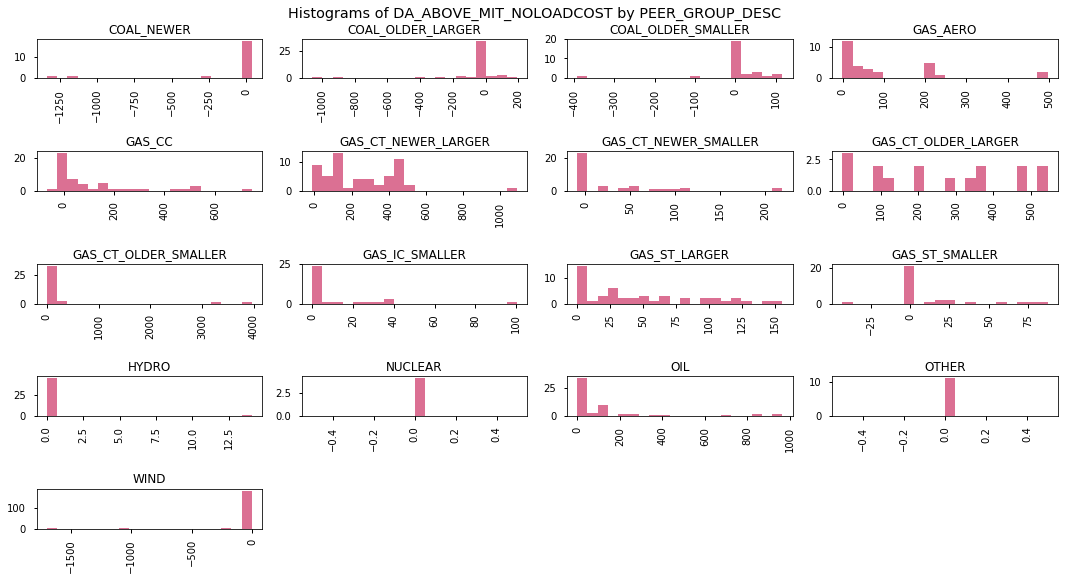

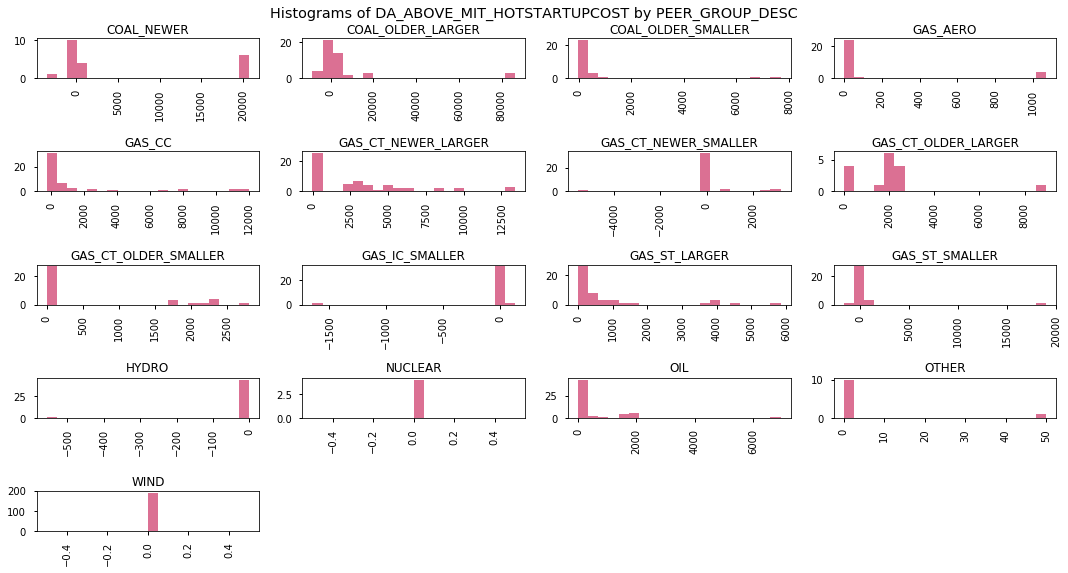

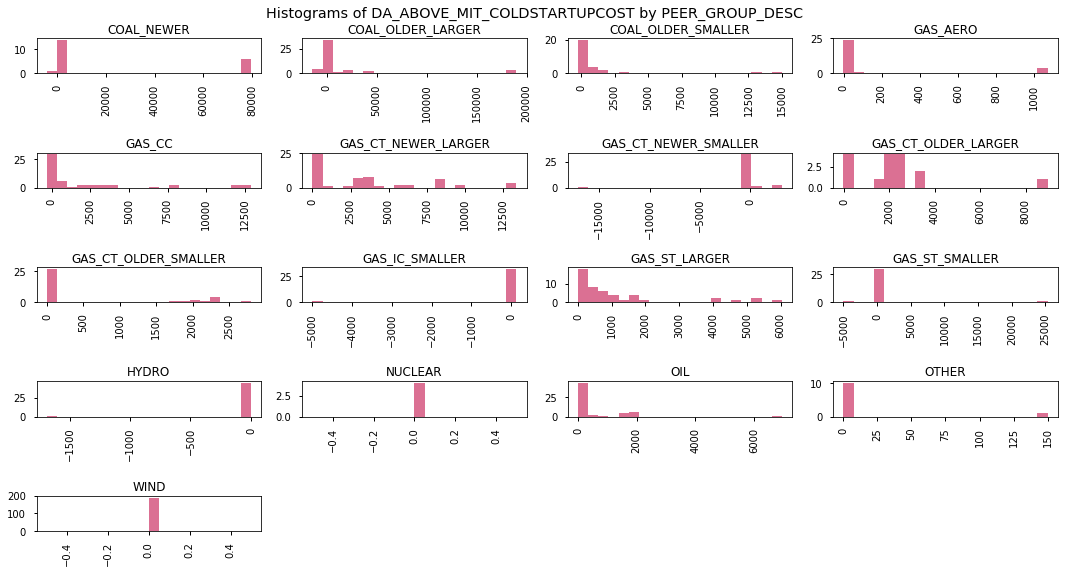

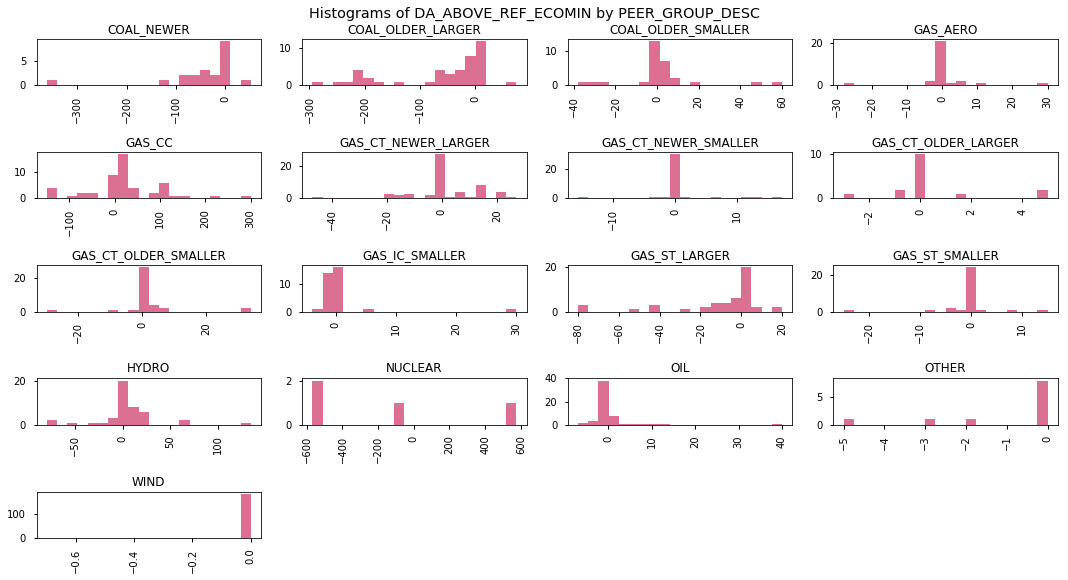

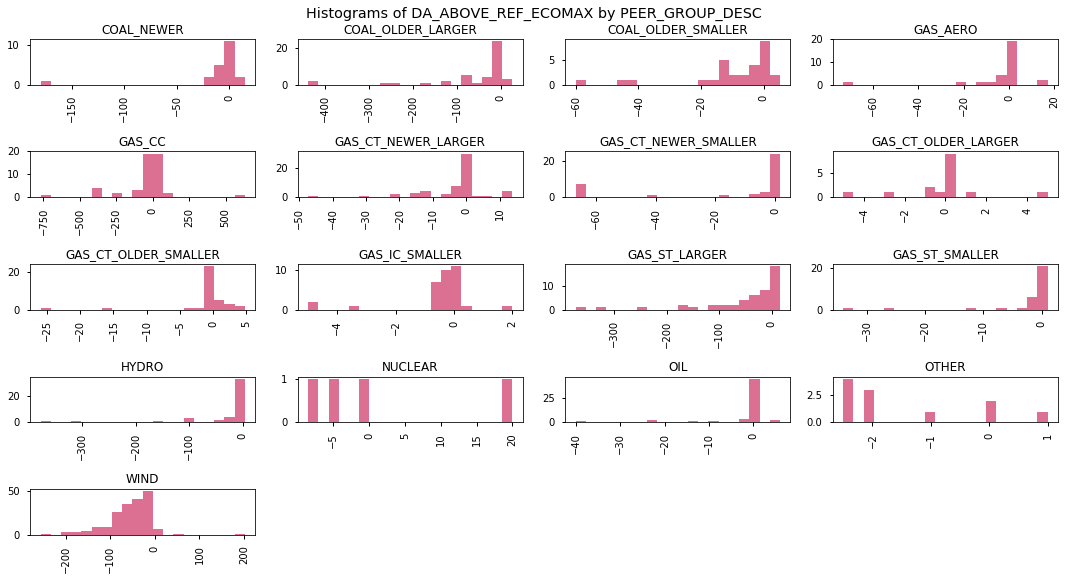

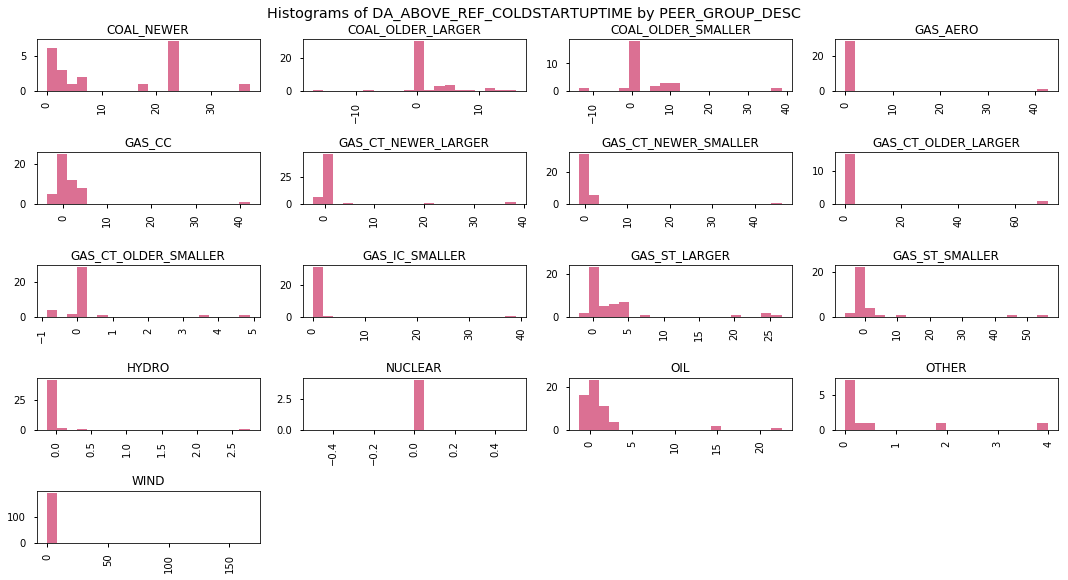

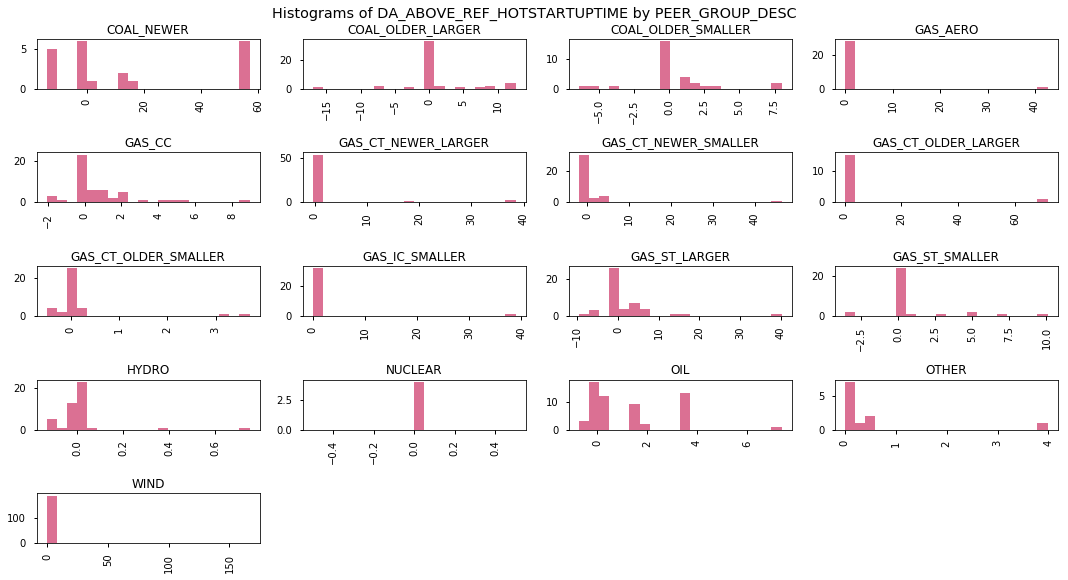

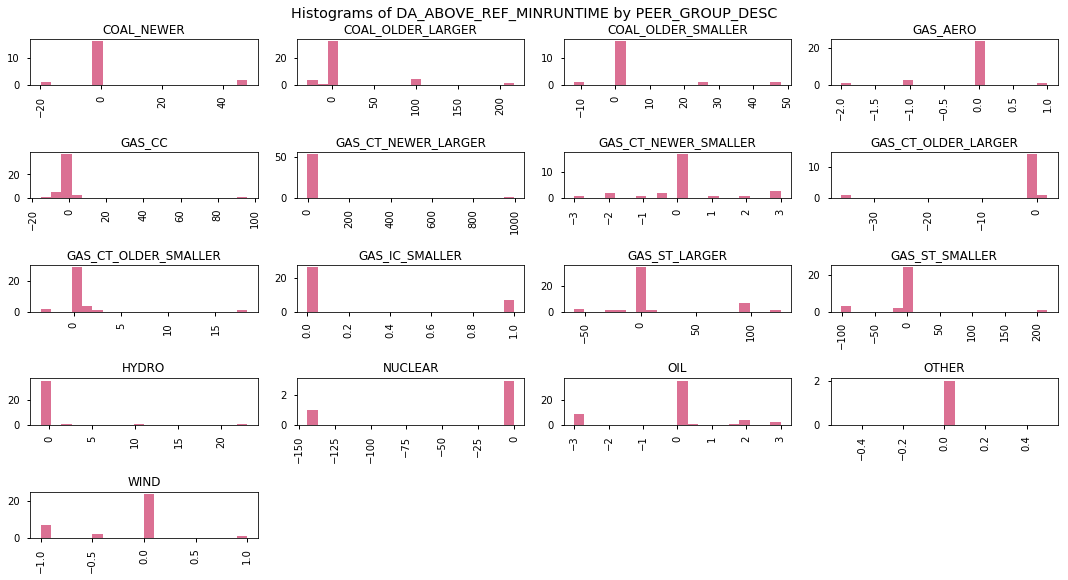

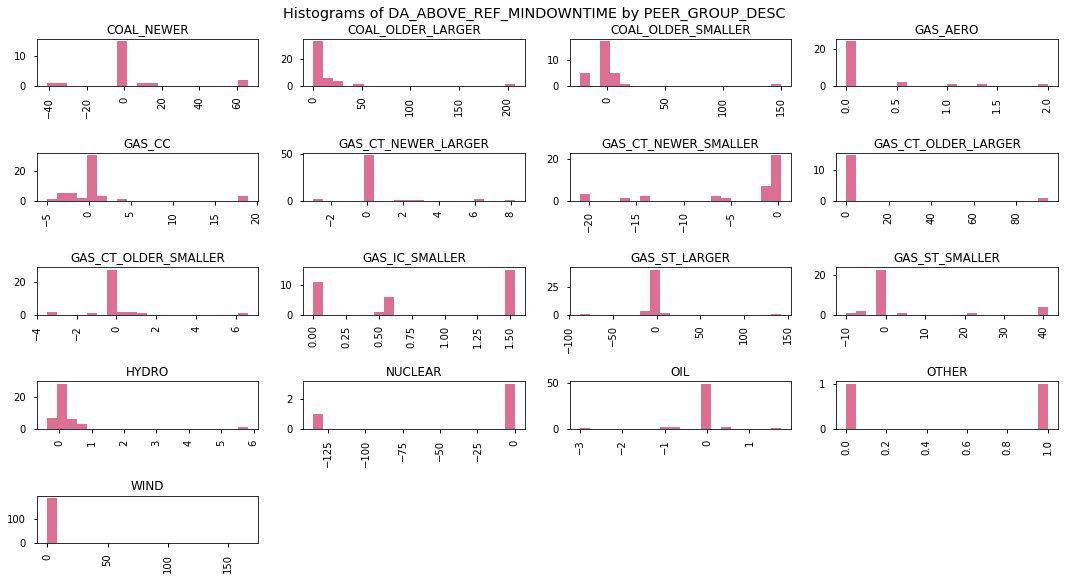

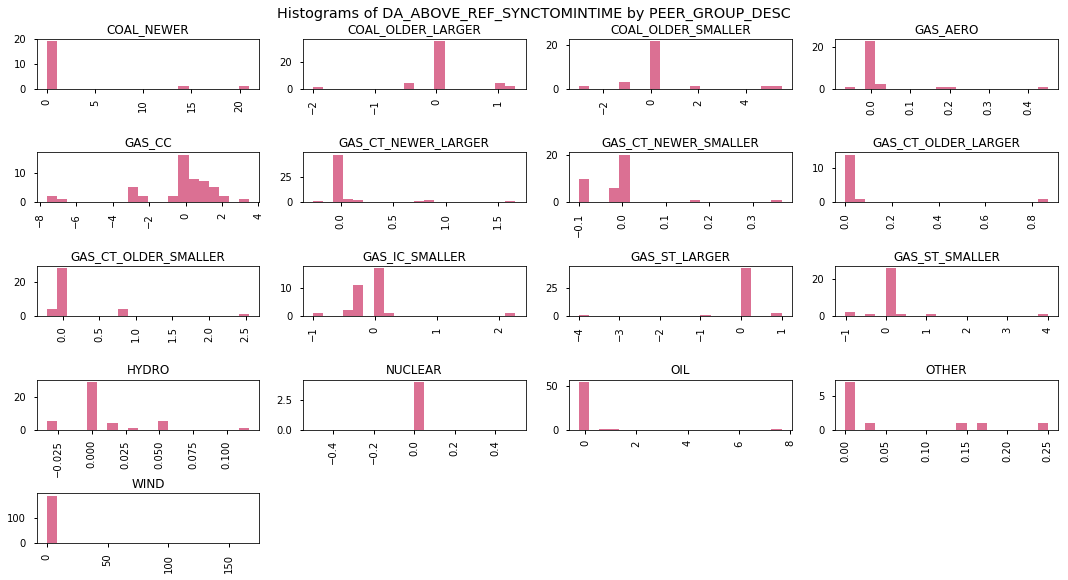

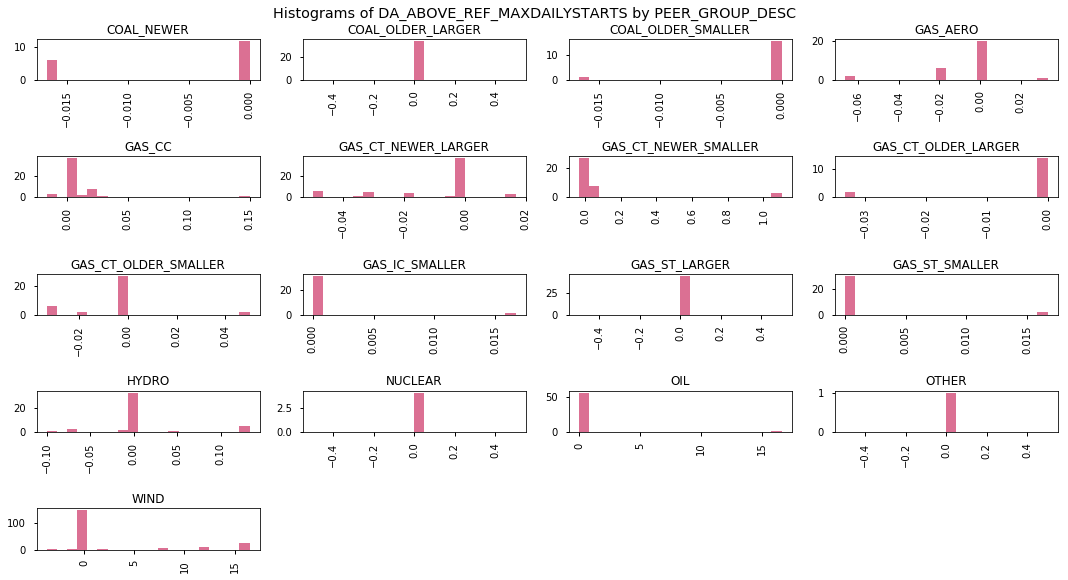

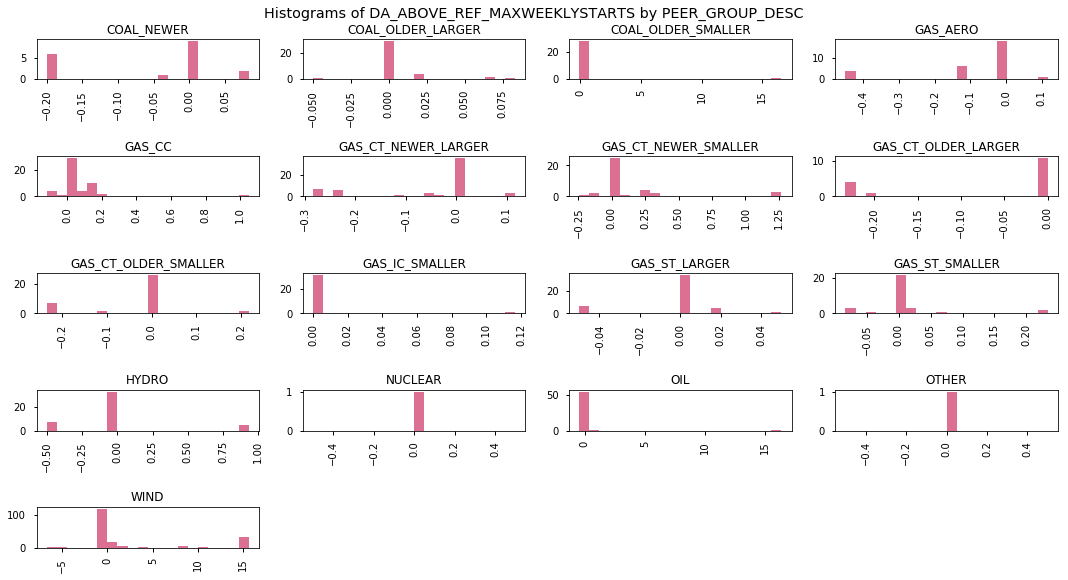

In [14]:
def HISTOGRAM_LOOP_DEVS(data,groupby):
    for parameter in DA_REF_DEVS:
        data[parameter].hist(figsize=(15,8),by=data[groupby], bins=20, color='palevioletred')
        plt.tight_layout()
        plt.suptitle("Histograms of " + parameter + " by " + groupby, verticalalignment='bottom', horizontalalignment='center')
        plt.show() 

HISTOGRAM_LOOP_DEVS(MONTHLY,'PEER_GROUP_DESC')

In [70]:
#Use groupby to take the average and stdv parameter values by peer group for each month
#Reset the index to retain peer group and month as variables
#Merge the tables and calculate how many standard deviations from the mean each unit is by month

PARAMETERS_MEAN=PARAMETERS.groupby(['PEER_GROUP_DESC','YEAR_MONTH']).mean()
PARAMETERS_MEAN.reset_index(inplace=True)
PARAMETERS_MEAN.rename(columns={'DA_NOLOADCOST': 'AVG_NOLOADCOST','DA_ECOMAX': 'AVG_ECOMAX','DA_ECOMIN': 'AVG_ECOMIN',
                               'DA_COLDSTARTUPCOST': 'AVG_COLDSTARTUPCOST','DA_HOTSTARTUPCOST': 'AVG_HOTSTARTUPCOST',
                                'DA_COLDSTARTUPTIME': 'AVG_COLDSTARTUPTIME','DA_HOTSTARTUPTIME': 'AVG_HOTSTARTUPTIME',
                                'DA_MINRUNTIME': 'AVG_MINRUNTIME','DA_MINDOWNTIME': 'AVG_MINDOWNTIME',
                                'DA_MAXDAILYSTARTS': 'AVG_MAXDAILYSTARTS','DA_MAXWEEKLYSTARTS': 'AVG_MAXWEEKLYSTARTS'}, inplace=True)

DA_PARAMETERS_MEAN=PARAMETERS_MEAN[['PEER_GROUP_DESC','YEAR_MONTH','AVG_NOLOADCOST','AVG_ECOMAX','AVG_ECOMIN',
                                'AVG_COLDSTARTUPCOST','AVG_HOTSTARTUPCOST','AVG_COLDSTARTUPTIME', 'AVG_HOTSTARTUPTIME',
                                 'AVG_MINRUNTIME', 'AVG_MINDOWNTIME','AVG_MAXDAILYSTARTS', 'AVG_MAXWEEKLYSTARTS']]

DA_PARAMETERS_STD=PARAMETERS.groupby(['PEER_GROUP_DESC','YEAR_MONTH']).mean()
DA_PARAMETERS_STD.reset_index(inplace=True)
DA_PARAMETERS_STD.rename(columns={'DA_NOLOADCOST': 'STD_NOLOADCOST','DA_ECOMAX': 'STD_ECOMAX','DA_ECOMIN': 'STD_ECOMIN',
                               'DA_COLDSTARTUPCOST': 'STD_COLDSTARTUPCOST','DA_HOTSTARTUPCOST': 'STD_HOTSTARTUPCOST',
                                'DA_COLDSTARTUPTIME': 'STD_COLDSTARTUPTIME','DA_HOTSTARTUPTIME': 'STD_HOTSTARTUPTIME',
                                'DA_MINRUNTIME': 'STD_MINRUNTIME','DA_MINDOWNTIME': 'STD_MINDOWNTIME',
                                'DA_MAXDAILYSTARTS': 'STD_MAXDAILYSTARTS','DA_MAXWEEKLYSTARTS': 'STD_MAXWEEKLYSTARTS'}, inplace=True)

DA_PARAMETERS_STD=DA_PARAMETERS_STD[['PEER_GROUP_DESC','YEAR_MONTH','STD_NOLOADCOST','STD_ECOMAX','STD_ECOMIN',
                                'STD_COLDSTARTUPCOST','STD_HOTSTARTUPCOST','STD_COLDSTARTUPTIME', 'STD_HOTSTARTUPTIME',
                                 'STD_MINRUNTIME', 'STD_MINDOWNTIME','STD_MAXDAILYSTARTS', 'STD_MAXWEEKLYSTARTS']]

DA_PARAMETERS=PARAMETERS[['MARKET_PARTICIPANT_LONG','MARKET_PARTICIPANT_SHORT','RESOURCENAME_LONG','PEER_GROUP_DESC','YEAR_MONTH',
                          'DA_NOLOADCOST','DA_ECOMAX','DA_ECOMIN','DA_COLDSTARTUPCOST','DA_HOTSTARTUPCOST','DA_COLDSTARTUPTIME', 
                          'DA_HOTSTARTUPTIME','DA_MINRUNTIME', 'DA_MINDOWNTIME','DA_MAXDAILYSTARTS', 'DA_MAXWEEKLYSTARTS']]


DA_PARAMETER_STATS1 = pd.merge(DA_PARAMETERS, DA_PARAMETERS_MEAN, on=['PEER_GROUP_DESC','YEAR_MONTH'])
DA_PARAMETER_STATS = pd.merge(DA_PARAMETER_STATS1, DA_PARAMETERS_STD, on=['PEER_GROUP_DESC','YEAR_MONTH'])


#Create new variables with z scores for each parameter

DA_PARAMETER_STATS['ECOMAX_Z'] = (DA_PARAMETER_STATS['DA_ECOMAX']-DA_PARAMETER_STATS['AVG_ECOMAX'])/DA_PARAMETER_STATS['STD_ECOMAX']
DA_PARAMETER_STATS['ECOMIN_Z'] = (DA_PARAMETER_STATS['DA_ECOMIN']-DA_PARAMETER_STATS['AVG_ECOMIN'])/DA_PARAMETER_STATS['STD_ECOMIN']
DA_PARAMETER_STATS['NOLOADCOST_Z'] = (DA_PARAMETER_STATS['DA_NOLOADCOST']-DA_PARAMETER_STATS['AVG_NOLOADCOST'])/DA_PARAMETER_STATS['STD_NOLOADCOST']
DA_PARAMETER_STATS['COLDSTARTUPCOST_Z'] = (DA_PARAMETER_STATS['DA_COLDSTARTUPCOST']-DA_PARAMETER_STATS['AVG_COLDSTARTUPCOST'])/DA_PARAMETER_STATS['STD_COLDSTARTUPCOST']
DA_PARAMETER_STATS['HOTSTARTUPCOST_Z'] = (DA_PARAMETER_STATS['DA_HOTSTARTUPCOST']-DA_PARAMETER_STATS['AVG_HOTSTARTUPCOST'])/DA_PARAMETER_STATS['STD_HOTSTARTUPCOST']
DA_PARAMETER_STATS['COLDSTARTUPTIME_Z'] = (DA_PARAMETER_STATS['DA_COLDSTARTUPTIME']-DA_PARAMETER_STATS['AVG_COLDSTARTUPTIME'])/DA_PARAMETER_STATS['STD_COLDSTARTUPTIME']
DA_PARAMETER_STATS['HOTSTARTUPTIME_Z'] = (DA_PARAMETER_STATS['DA_HOTSTARTUPTIME']-DA_PARAMETER_STATS['AVG_HOTSTARTUPTIME'])/DA_PARAMETER_STATS['STD_HOTSTARTUPTIME']
DA_PARAMETER_STATS['MINRUNTIME_Z'] = (DA_PARAMETER_STATS['DA_MINRUNTIME']-DA_PARAMETER_STATS['AVG_MINRUNTIME'])/DA_PARAMETER_STATS['STD_MINRUNTIME']
DA_PARAMETER_STATS['MINDOWNTIME_Z'] = (DA_PARAMETER_STATS['DA_MINDOWNTIME']-DA_PARAMETER_STATS['AVG_MINDOWNTIME'])/DA_PARAMETER_STATS['STD_MINDOWNTIME']
DA_PARAMETER_STATS['MAXDAILYSTARTS_Z'] = (DA_PARAMETER_STATS['DA_MAXDAILYSTARTS']-DA_PARAMETER_STATS['AVG_MAXDAILYSTARTS'])/DA_PARAMETER_STATS['STD_MAXDAILYSTARTS']
DA_PARAMETER_STATS['MAXWEEKLYSTARTS_Z'] = (DA_PARAMETER_STATS['DA_MAXWEEKLYSTARTS']-DA_PARAMETER_STATS['AVG_MAXWEEKLYSTARTS'])/DA_PARAMETER_STATS['STD_MAXWEEKLYSTARTS']

DA_PARAMETER_STATS['ECOMIN_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['ECOMIN_Z'])<2, 0, 1)
DA_PARAMETER_STATS['ECOMAX_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['ECOMAX_Z'])<2, 0, 1)
DA_PARAMETER_STATS['NOLOADCOST_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['NOLOADCOST_Z'])<2, 0, 1)
DA_PARAMETER_STATS['COLDSTARTUPCOST_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['COLDSTARTUPCOST_Z'])<2, 0, 1)
DA_PARAMETER_STATS['HOTSTARTUPCOST_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['HOTSTARTUPCOST_Z'])<2, 0, 1)
DA_PARAMETER_STATS['COLDSTARTUPTIME_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['COLDSTARTUPTIME_Z'])<2, 0, 1)
DA_PARAMETER_STATS['HOTSTARTUPTIME_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['HOTSTARTUPTIME_Z'])<2, 0, 1)
DA_PARAMETER_STATS['MINRUNTIME_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['MINRUNTIME_Z'])<2, 0, 1)
DA_PARAMETER_STATS['MINDOWNTIME_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['MINDOWNTIME_Z'])<2, 0, 1)
DA_PARAMETER_STATS['MAXDAILYSTARTS_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['MAXDAILYSTARTS_Z'])<2, 0, 1)
DA_PARAMETER_STATS['MAXWEEKLYSTARTS_OUTLIER'] = np.where(abs(DA_PARAMETER_STATS['MAXWEEKLYSTARTS_Z'])<2, 0, 1)

DA_PARAMETER_STATS.head()

MARKET_PARTICIPANT_LONG MARKET_PARTICIPANT_SHORT    RESOURCENAME_LONG  \
0     AECC - CHISHOLM VIEW 2                   CHM2_X  OKGE.AECC.CHISHOLM2   
1          AECC - DRIFT SAND                   DRFT_X  CSWS.AECC.DRIFTSAND   
2  AECC - FLAT RIDGE 2 SOUTH                   FR2S_X    WR_FLATRIDGESOUTH   
3              AECC - ORIGIN                   ORIG_X      OKGE_ORIGINWIND   
4    ALEXANDER WIND FARM LLC                     NJAL       MIDW.NJAL.ALEX   

  PEER_GROUP_DESC YEAR_MONTH  DA_NOLOADCOST  DA_ECOMAX  DA_ECOMIN  \
0            WIND    2017-01            0.0     14.965        0.0   
1            WIND    2017-01            0.0     43.232        0.0   
2            WIND    2017-01            0.0     20.126        0.0   
3            WIND    2017-01            0.0     70.903        0.0   
4            WIND    2017-01            0.0     25.700        0.0   

   DA_COLDSTARTUPCOST  DA_HOTSTARTUPCOST           ...             \
0                 0.0                0.0           ...              
1                 0.0                0.0           ...              
2                 0.0                0.0           ...              
3                 0.0                0.0           ...              
4                 0.0                0.0           ...              

   ECOMAX_OUTLIER  NOLOADCOST_OUTLIER  COLDSTARTUPCOST_OUTLIER  \
0               0                   0                        0   
1               0                   0                        0   
2               0                   0                        0   
3               0                   0                        0   
4               0                   0                        0   

   HOTSTARTUPCOST_OUTLIER  COLDSTARTUPTIME_OUTLIER  HOTSTARTUPTIME_OUTLIER  \
0                       0                        0                       0   
1                       0                        0                       0   
2                       0                        0                       0   
3                       0                        0                       0   
4                       0                        0                       0   

   MINRUNTIME_OUTLIER  MINDOWNTIME_OUTLIER  MAXDAILYSTARTS_OUTLIER  \
0                   0                    0                       0   
1                   0                    0                       0   
2                   0                    0                       0   
3                   0                    0                       0   
4                   0                    0                       0   

   MAXWEEKLYSTARTS_OUTLIER  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 60 columns]

In [68]:
PARAMETER_STATS_MONTHLY=DA_PARAMETER_STATS[DA_PARAMETER_STATS['YEAR_MONTH']=='2017-12']

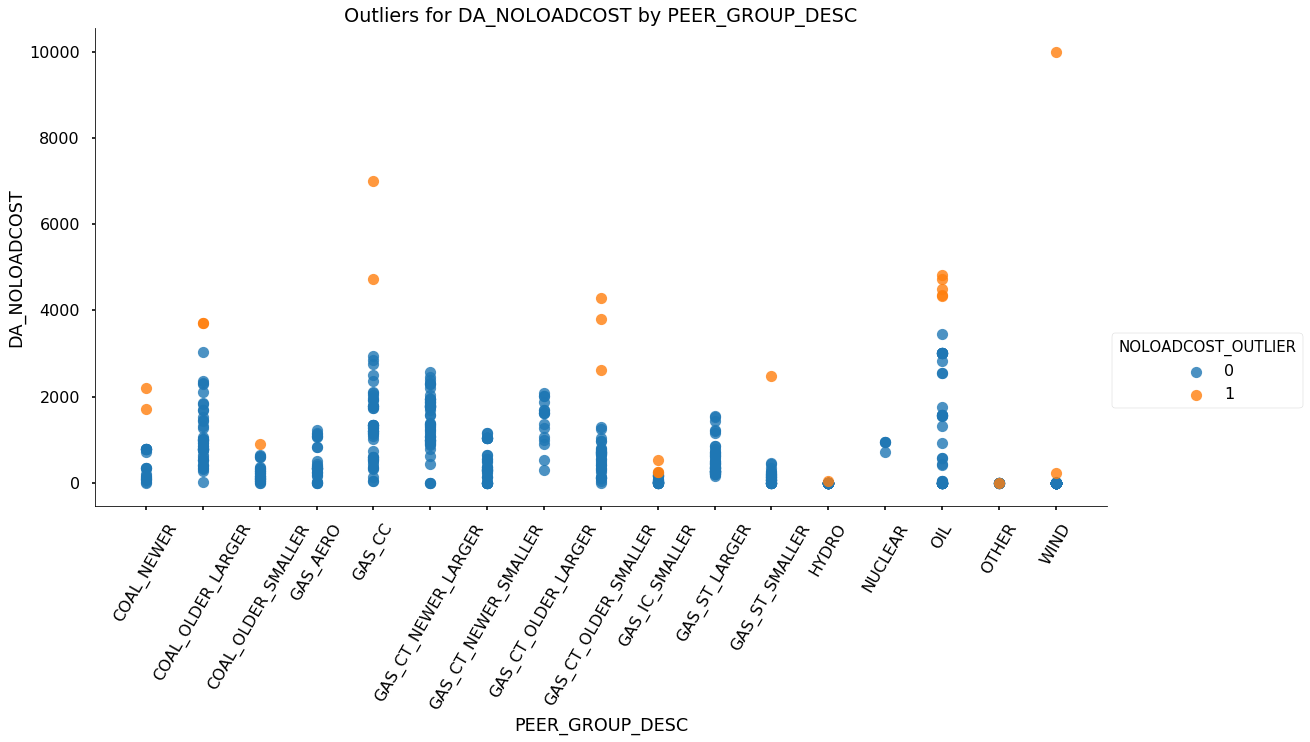

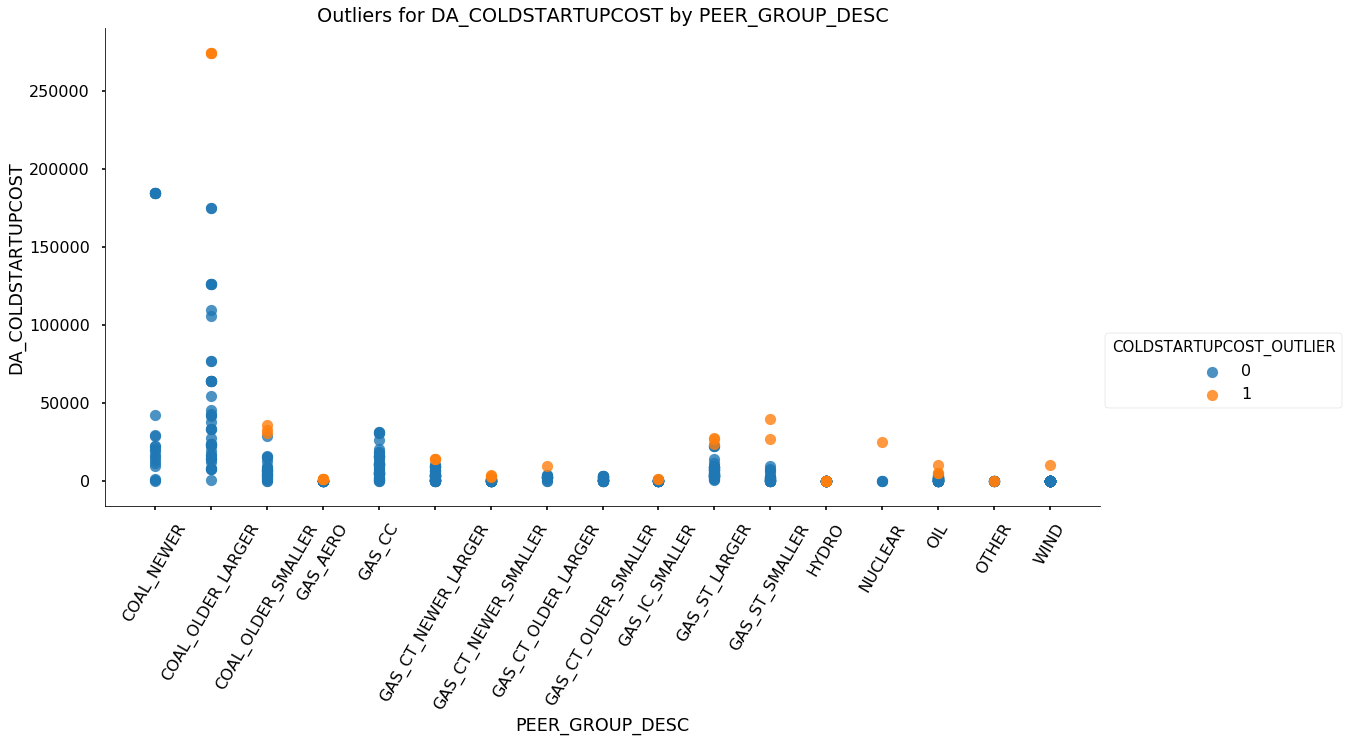

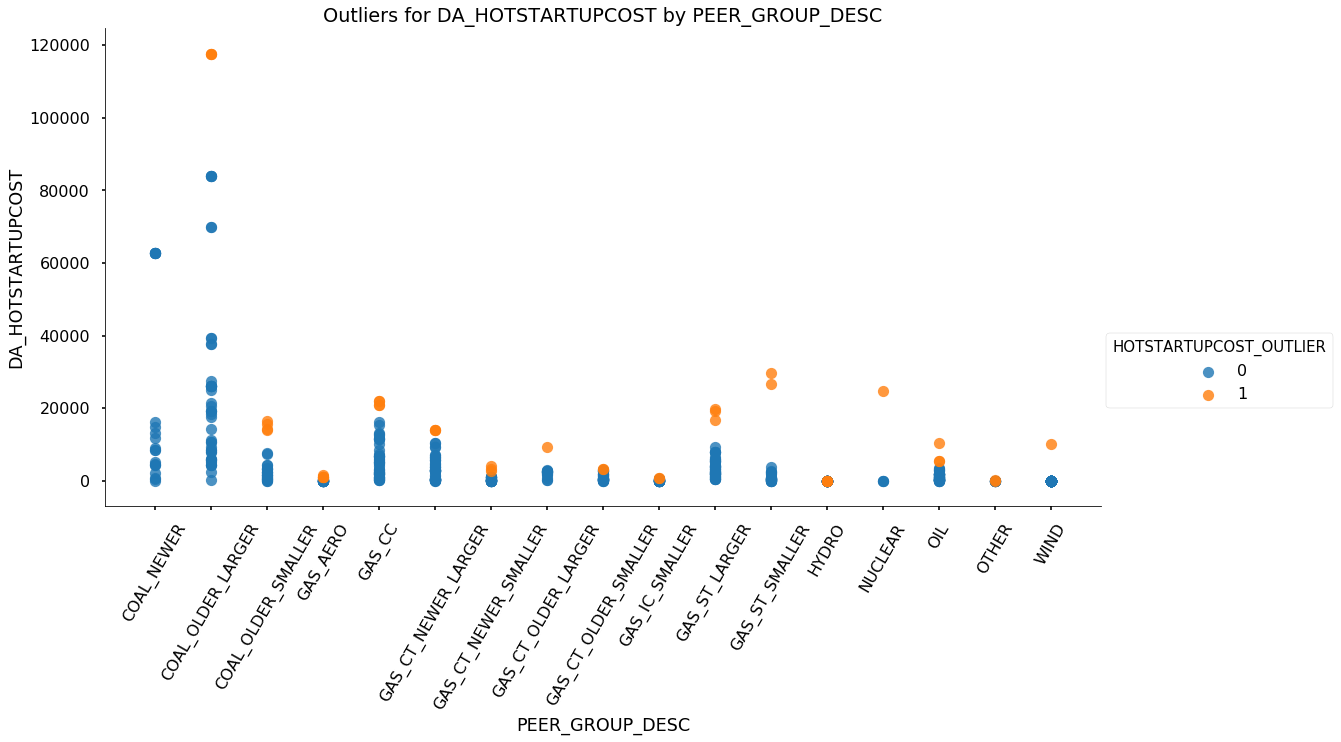

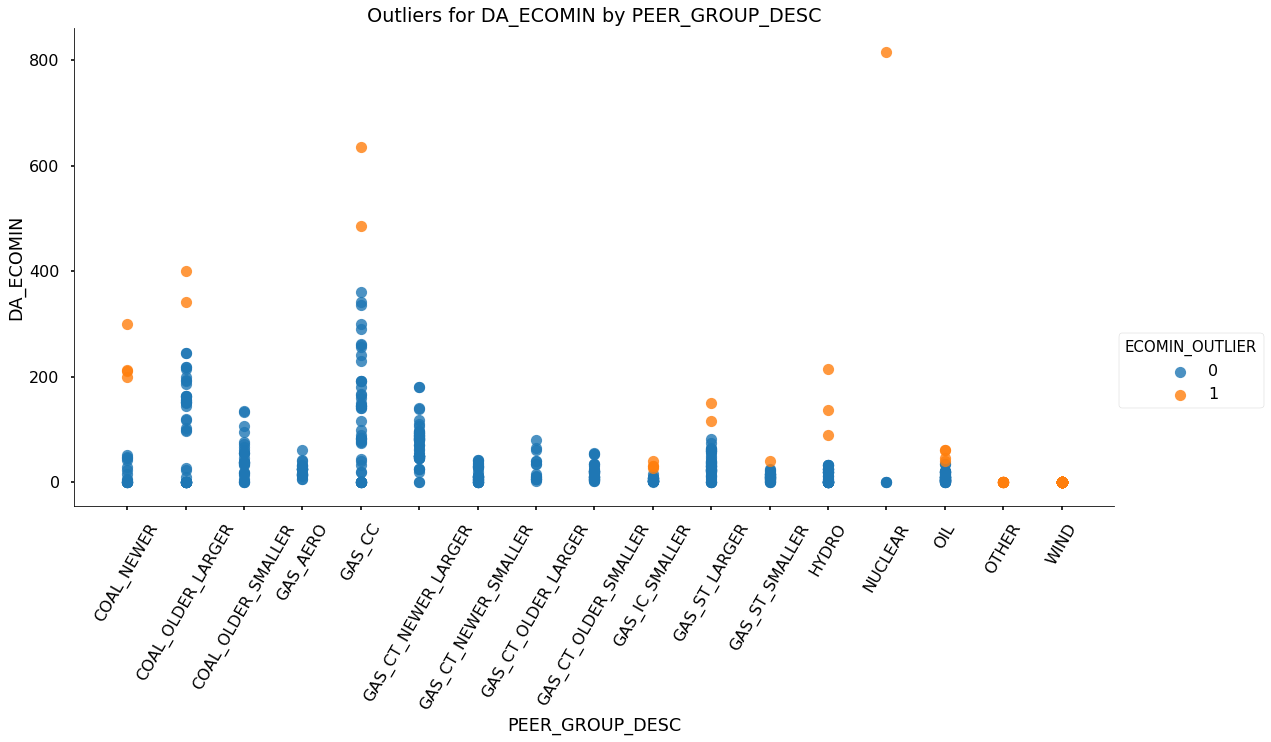

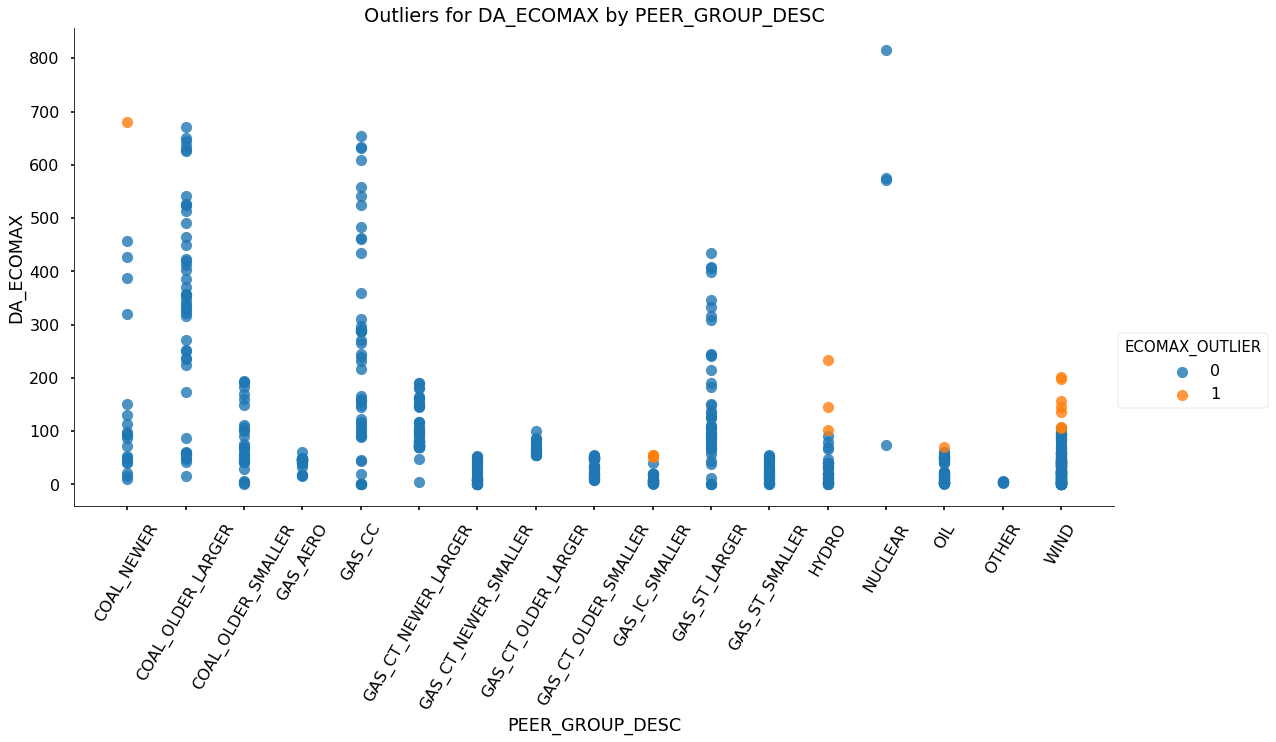

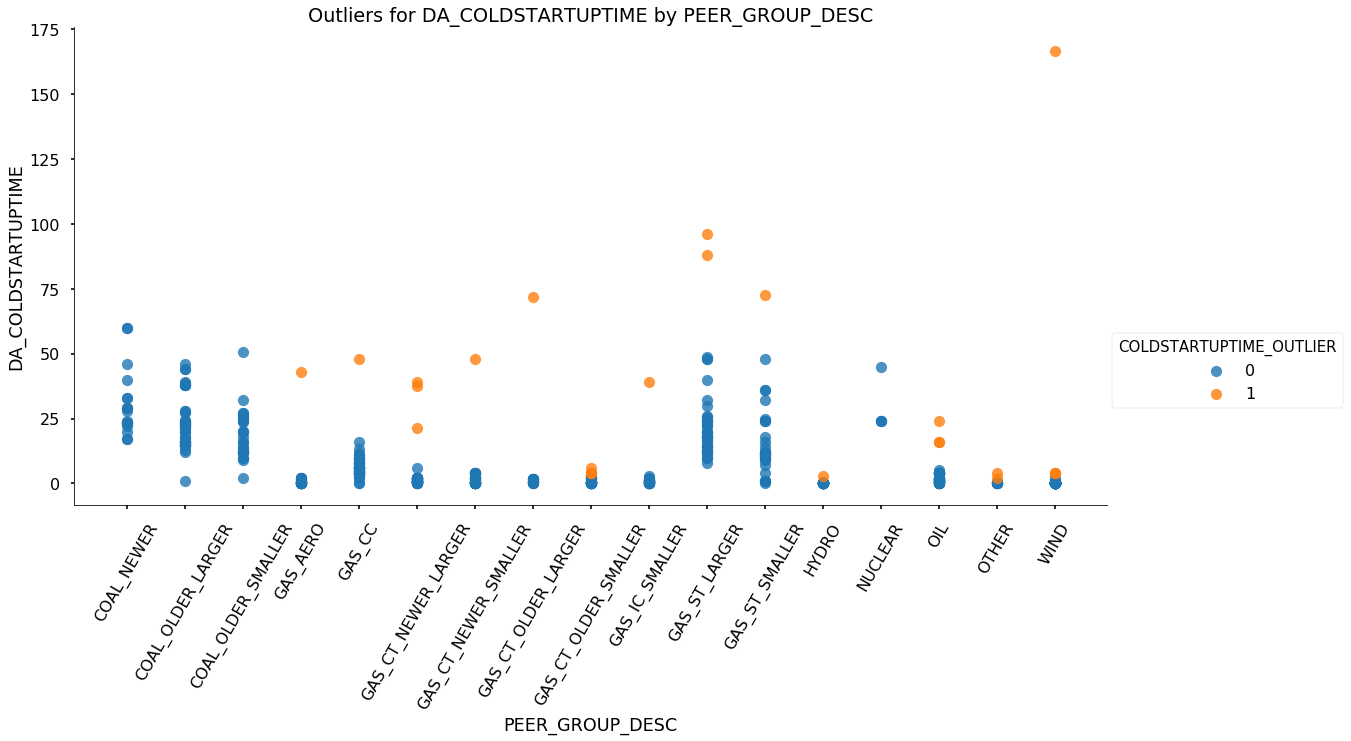

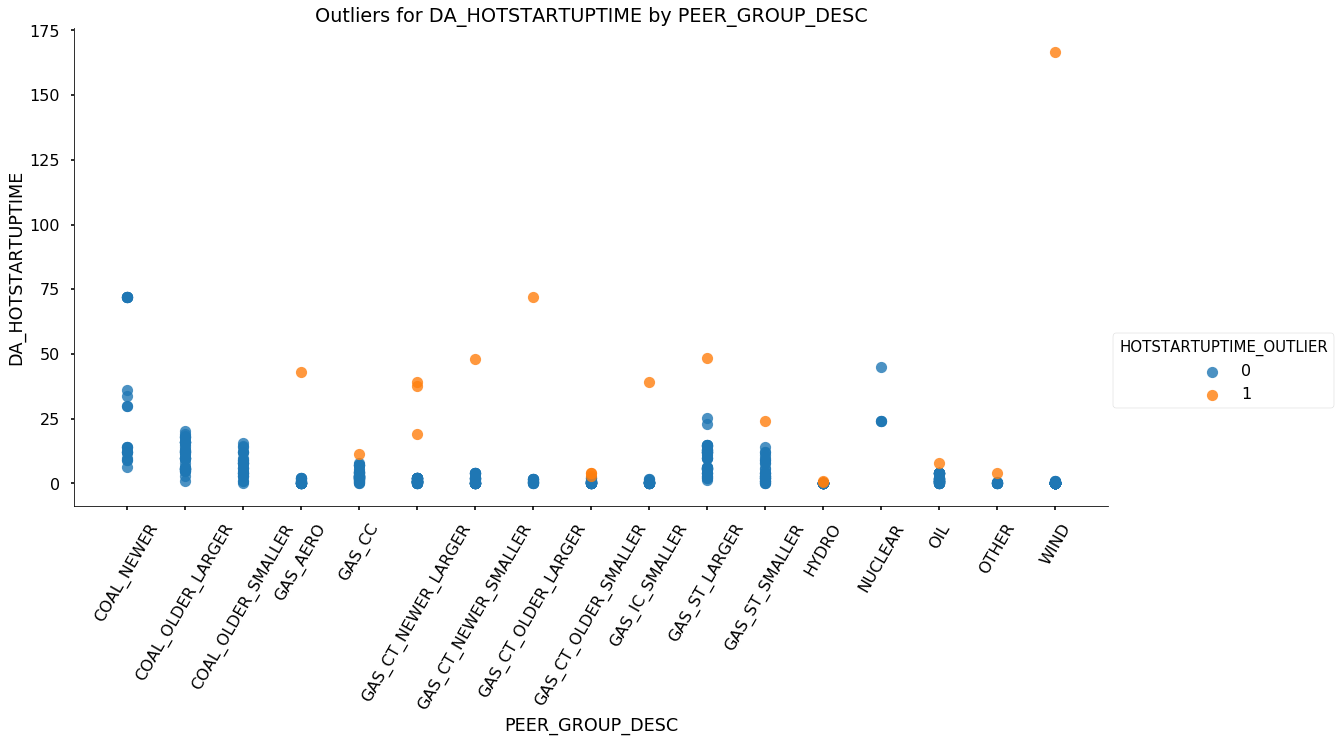

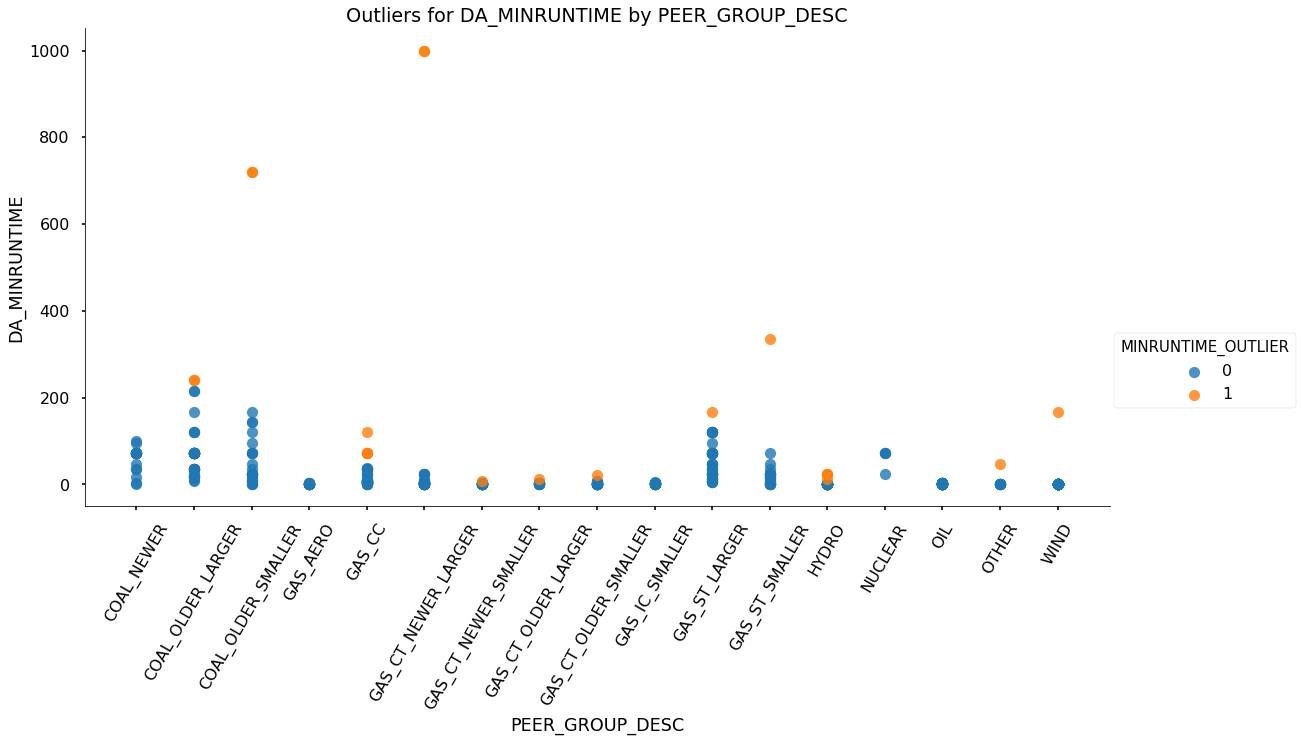

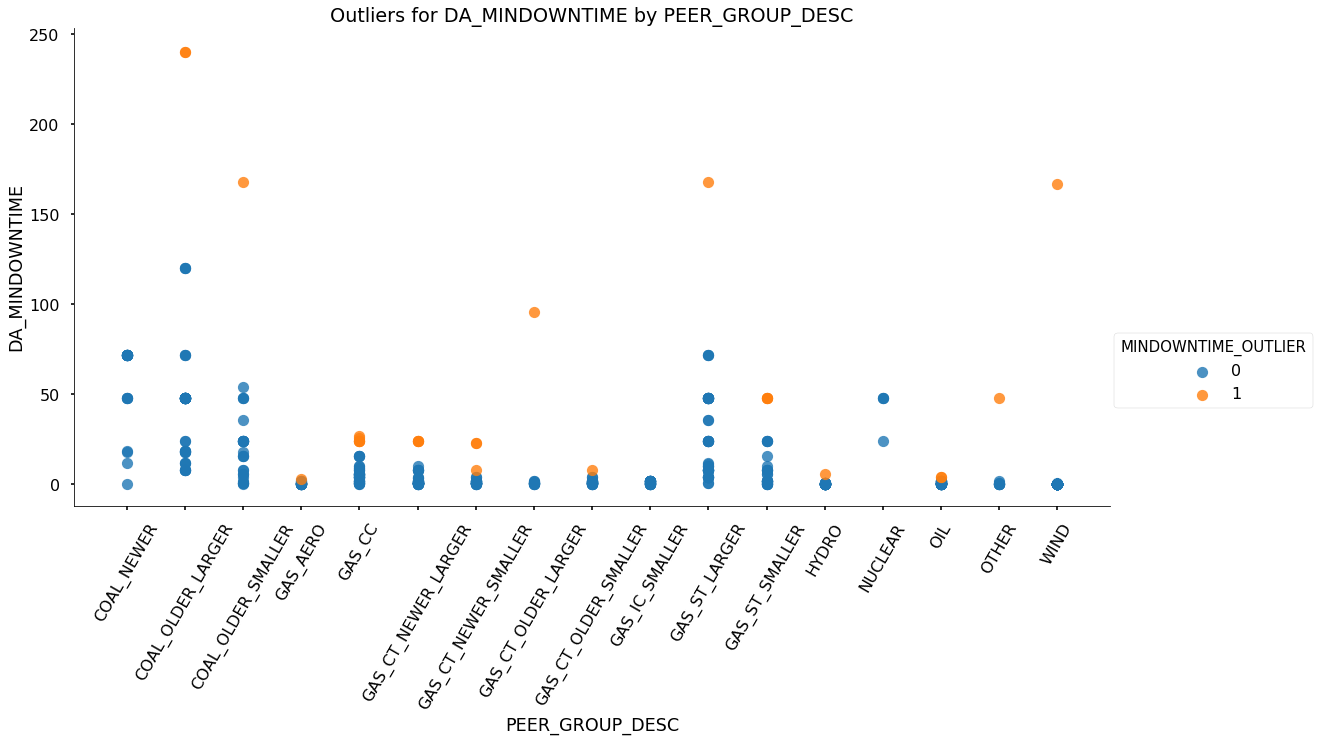

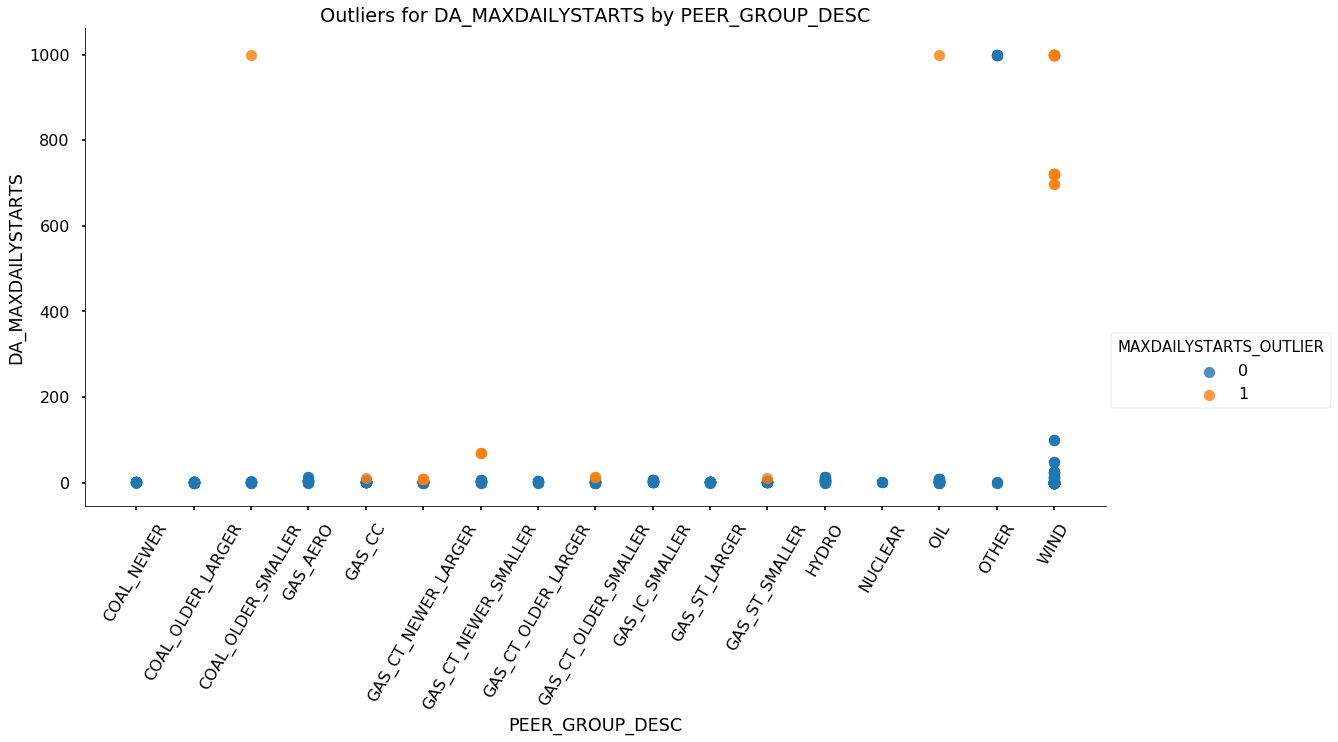

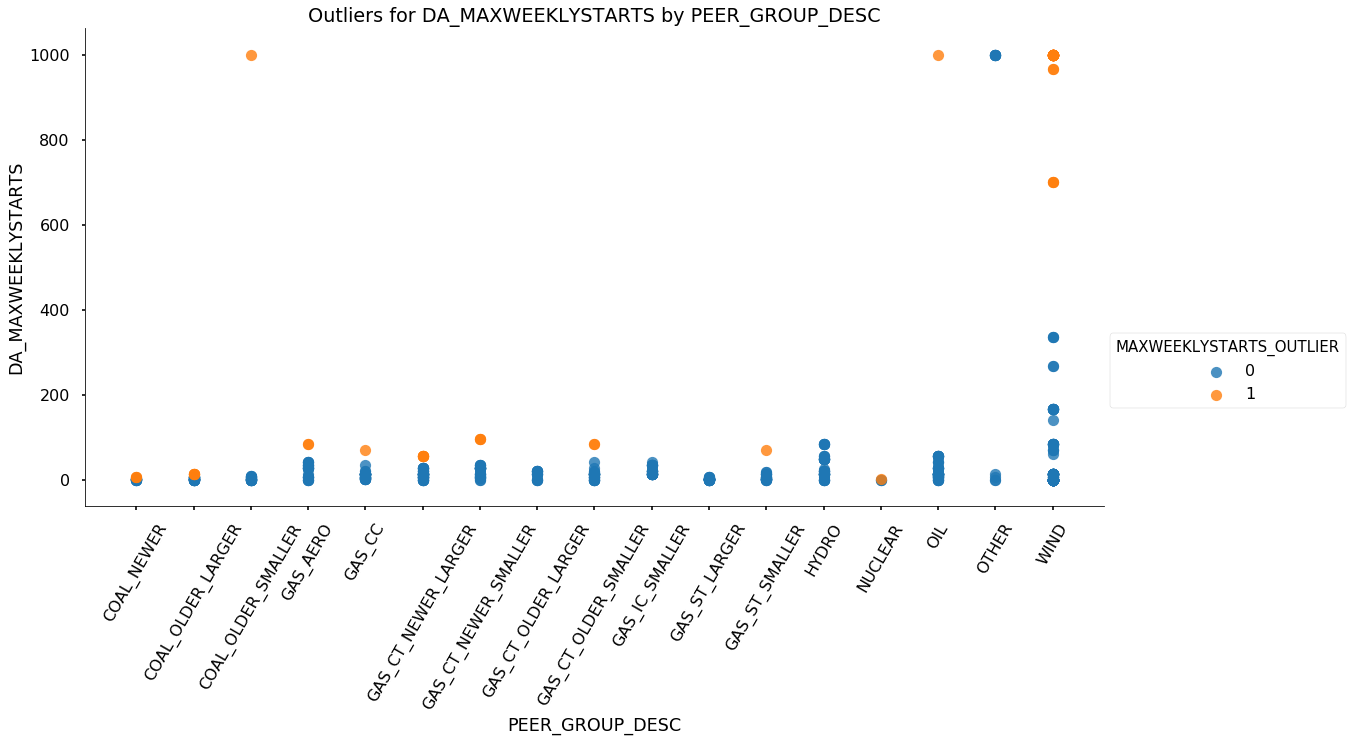

In [69]:
sns.set_context('notebook',font_scale=1)

def OUTLIER_PLOT_LOOP(x, data):
    for PARAM in PARAMS:
        sns.set_context('poster',font_scale=1)
        sns.lmplot(x=x, y=PARAM, hue=PARAM.split('_')[1]+'_OUTLIER', data=data, fit_reg=False,size = 8, aspect =2,)

        plt.xticks(rotation=60)
        plt.xlabel(x)
        plt.ylabel(PARAM)
        plt.title('Outliers for ' + PARAM + ' by ' + x)
        plt.show()
    
OUTLIER_PLOT_LOOP('PEER_GROUP_DESC',PARAMETER_STATS_MONTHLY)

In [20]:
PARAMETER_STATS_MONTHLY.iplot(kind='scatter', x='PEER_GROUP_DESC', y='DA_NOLOADCOST', mode='markers')

In [14]:
AVG_PARAMS = ['AVG_NOLOADCOST','AVG_COLDSTARTUPCOST','AVG_HOTSTARTUPCOST','AVG_ECOMIN','AVG_ECOMAX','AVG_COLDSTARTUPTIME',
          'AVG_HOTSTARTUPTIME', 'AVG_MINRUNTIME','AVG_MINDOWNTIME','AVG_MAXDAILYSTARTS','AVG_MAXWEEKLYSTARTS']

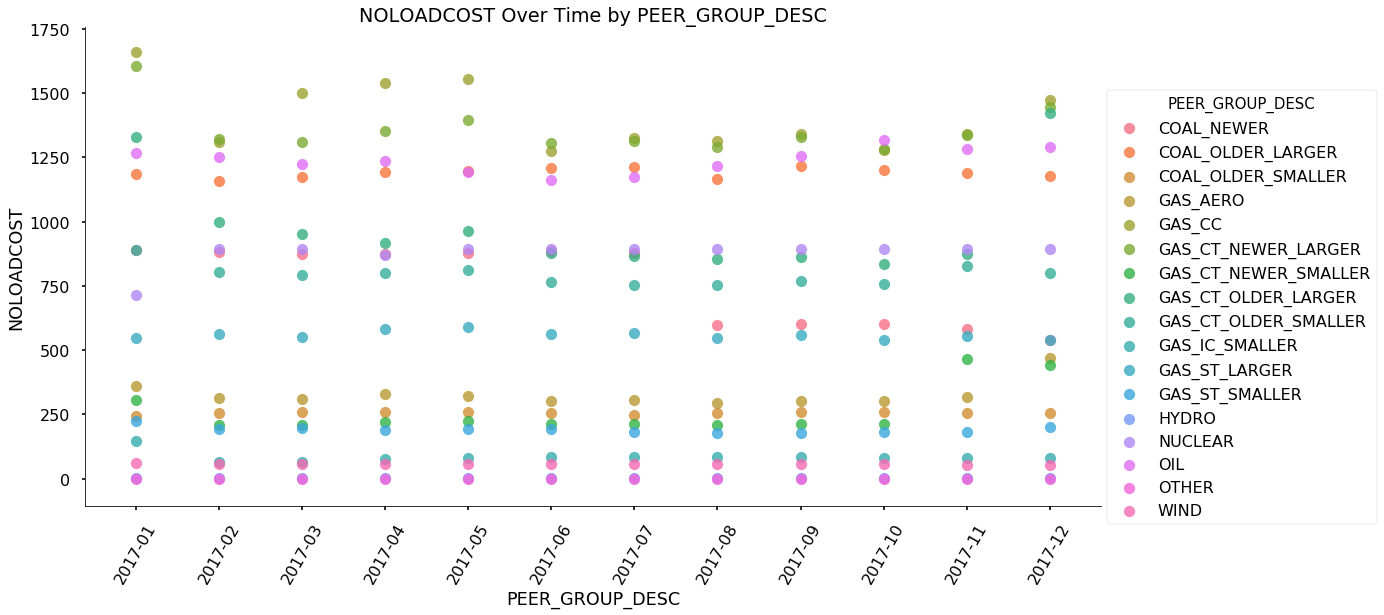

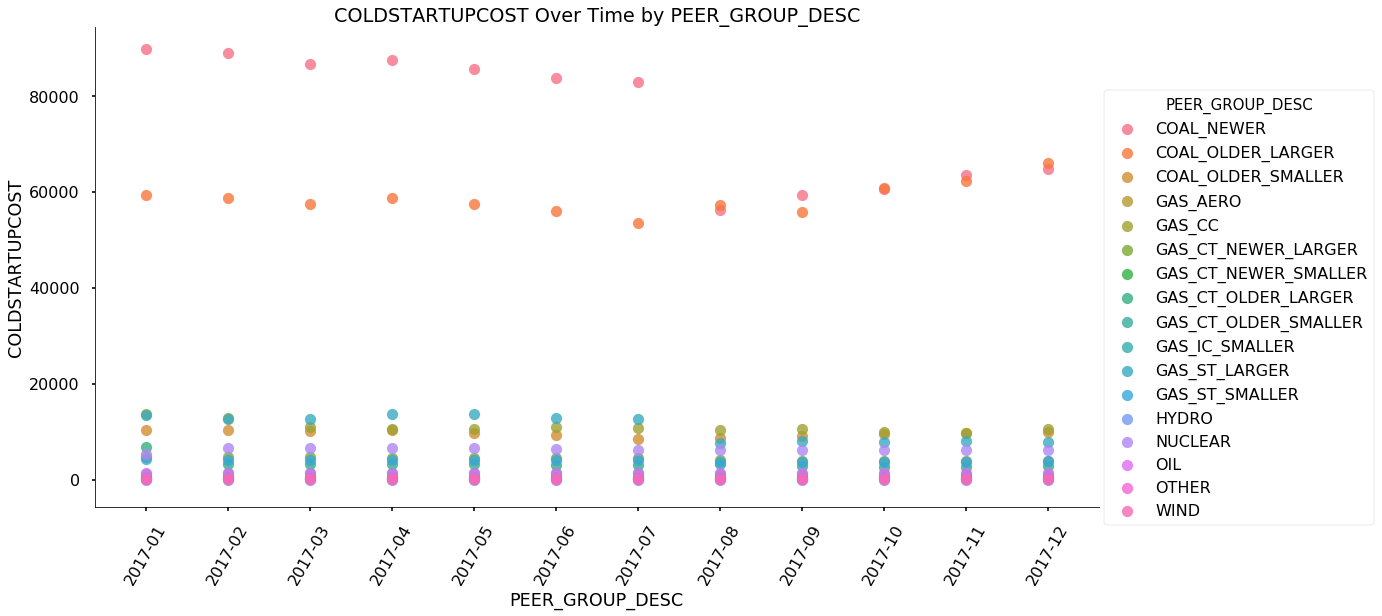

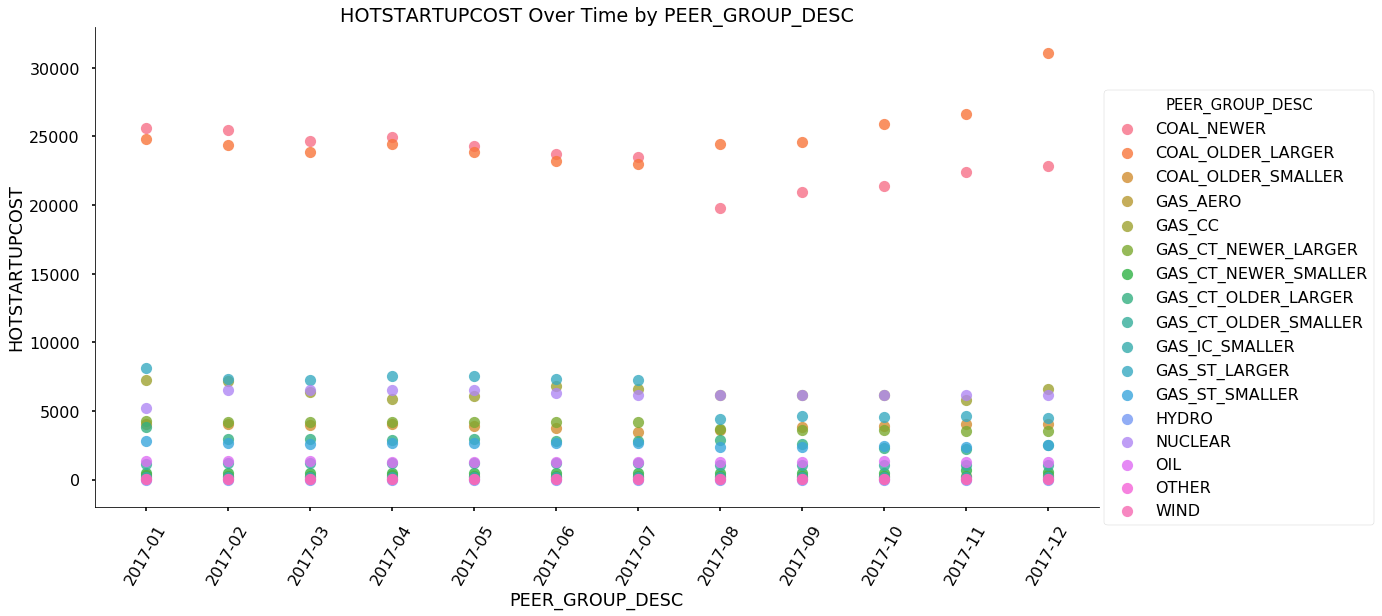

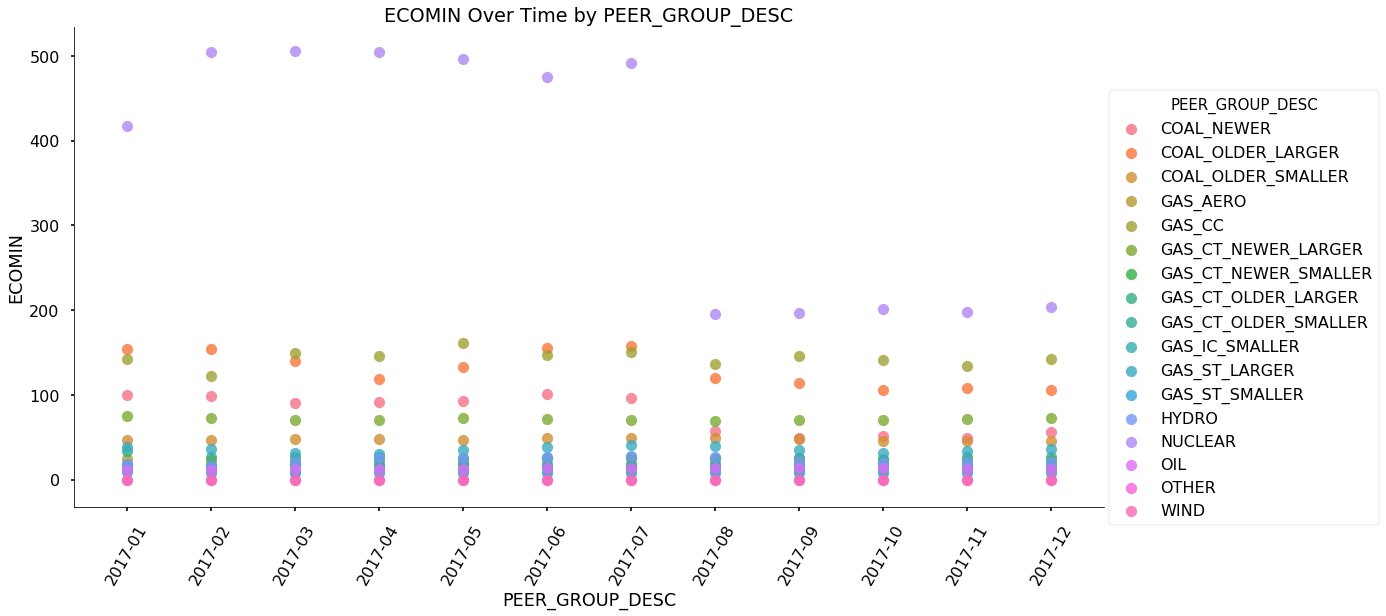

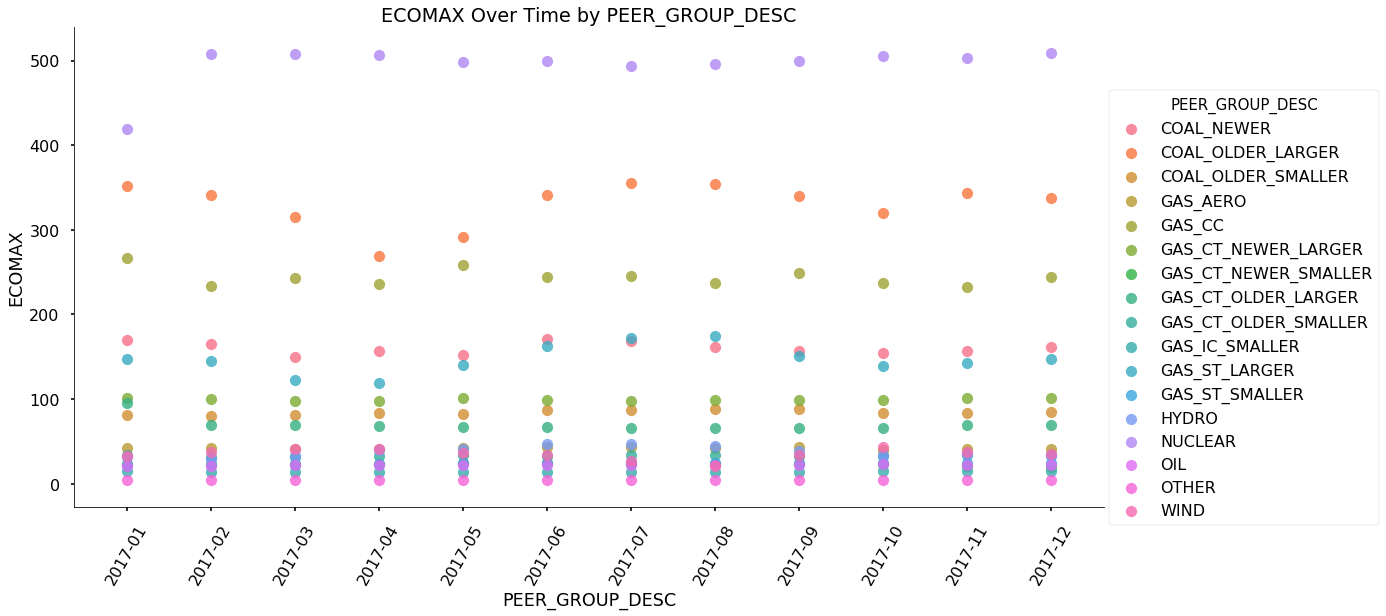

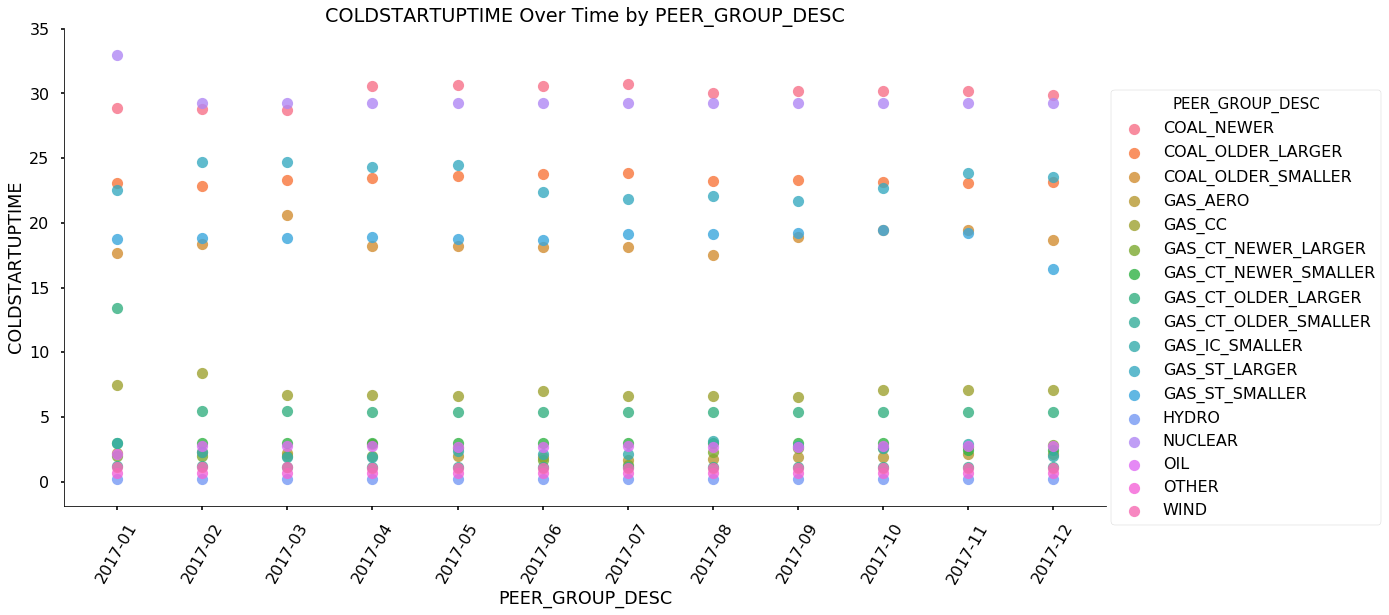

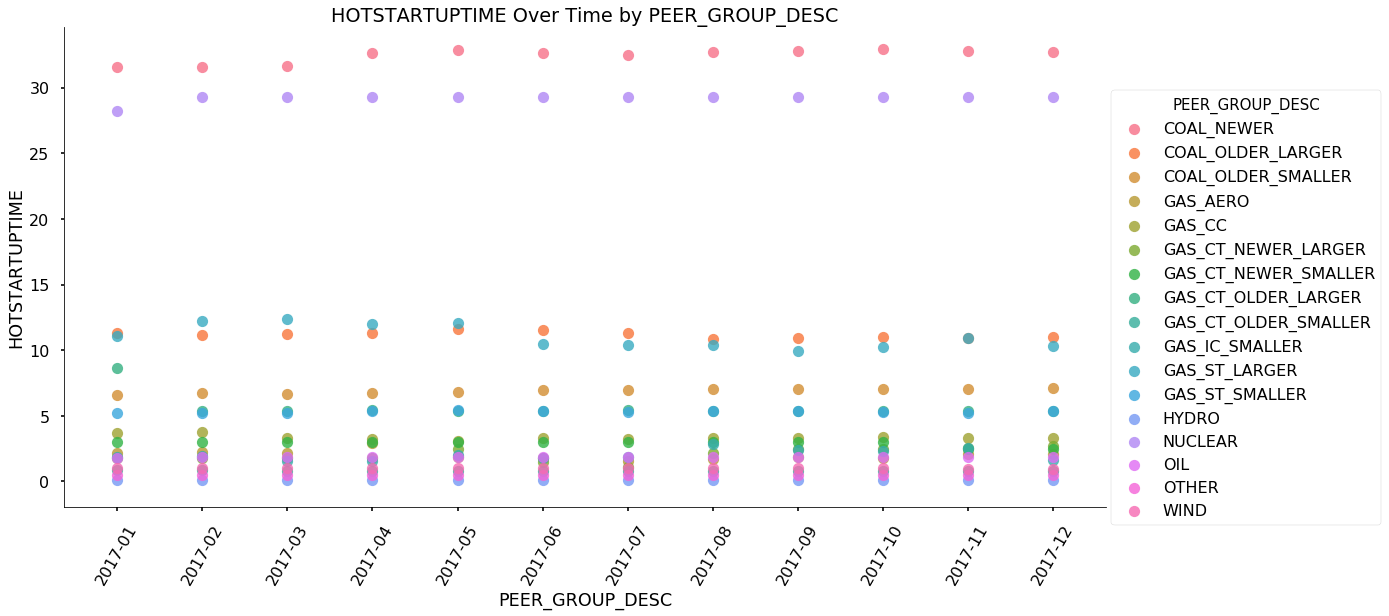

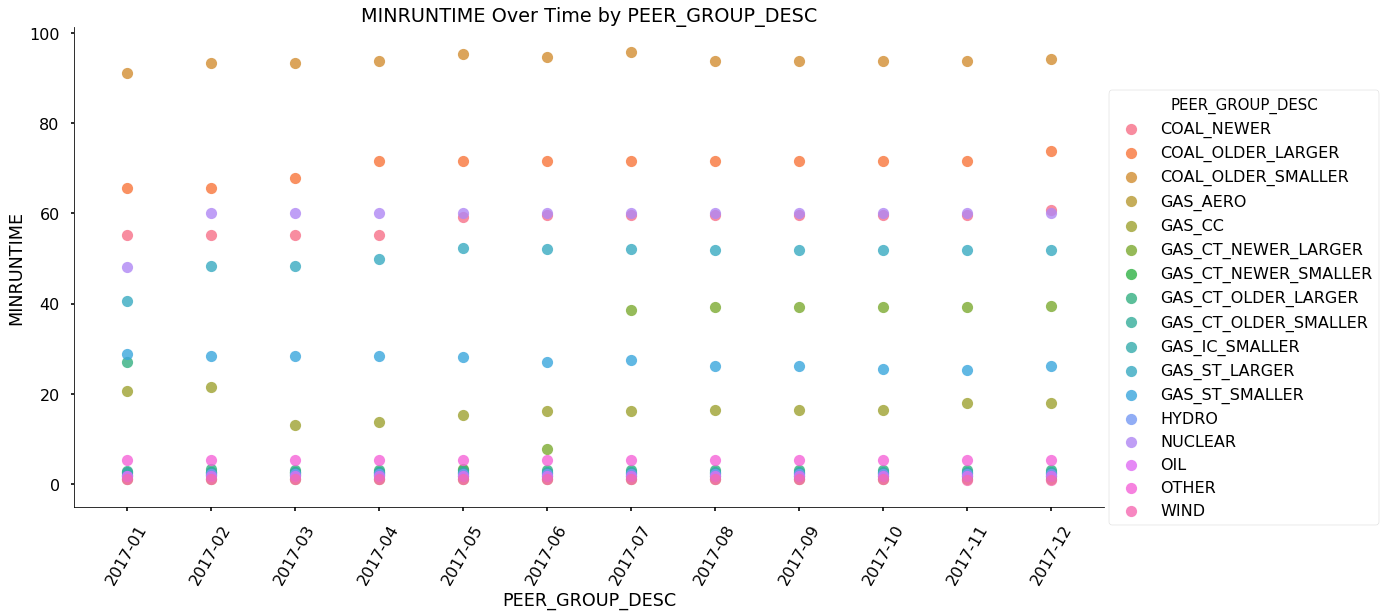

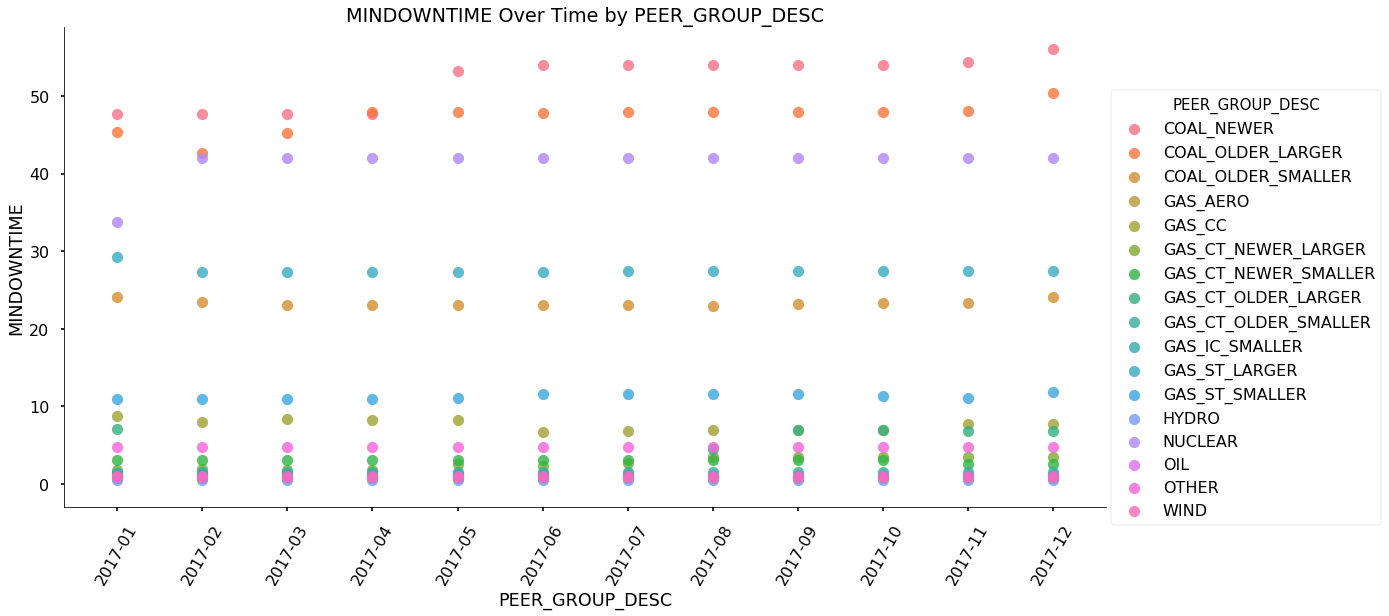

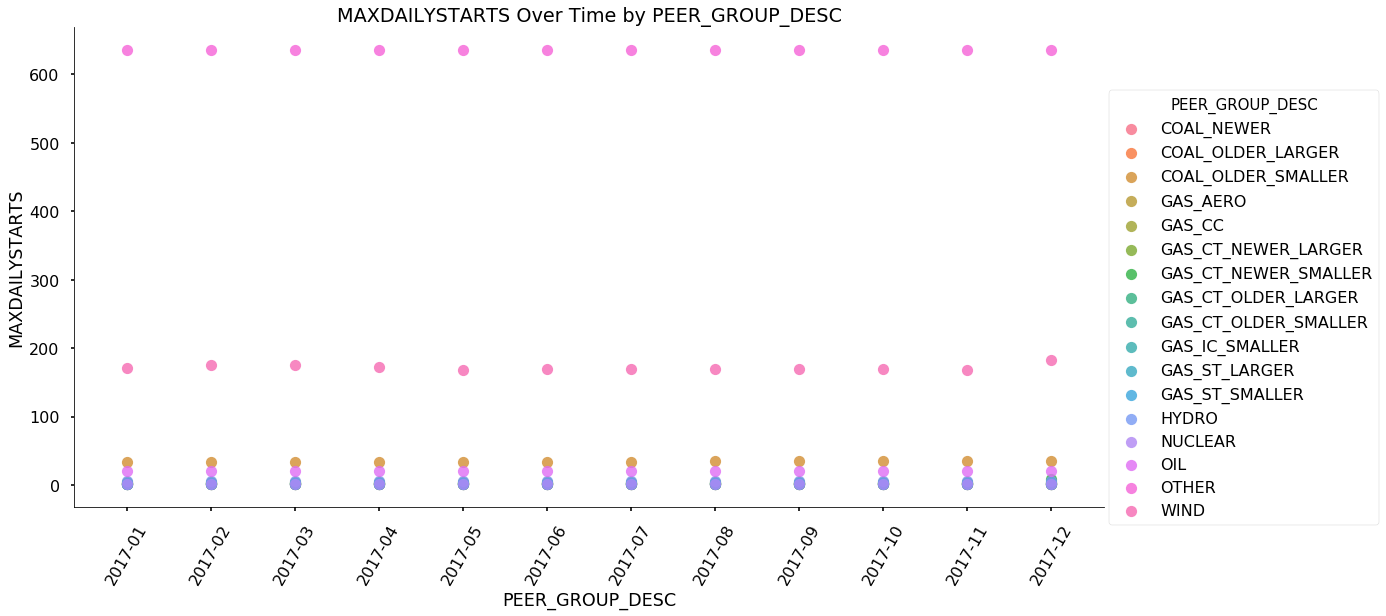

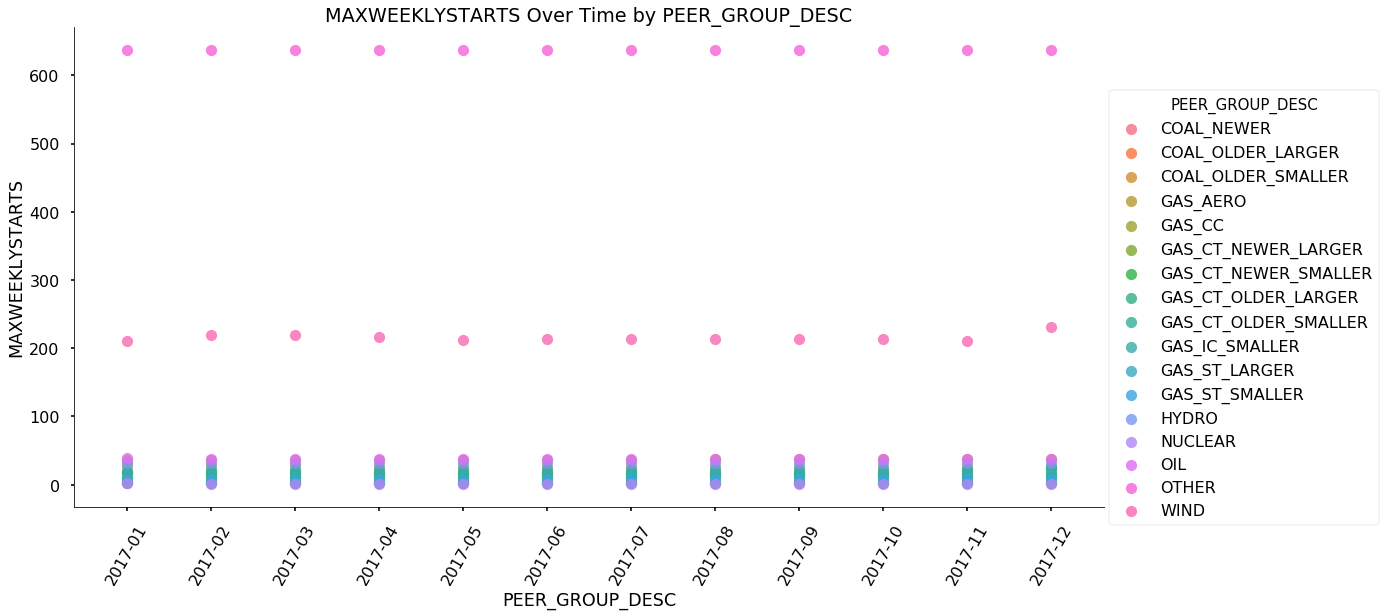

In [15]:
def AVG_PARAM_TIMESERIES(x, groupby, data):
    for PARAM in AVG_PARAMS:
        sns.set_context('poster',font_scale=1)
        sns.lmplot(x=x, y=PARAM, hue=groupby, data=data, fit_reg=False,size = 8,
           aspect =2,)
        plt.xticks(rotation=60)
        plt.xlabel(groupby)
        plt.ylabel(PARAM.split('_')[1])
        plt.title(PARAM.split('_')[1] + " Over Time by "+ groupby)

AVG_PARAM_TIMESERIES('YEAR_MONTH','PEER_GROUP_DESC',DA_PARAMETERS_MEAN)

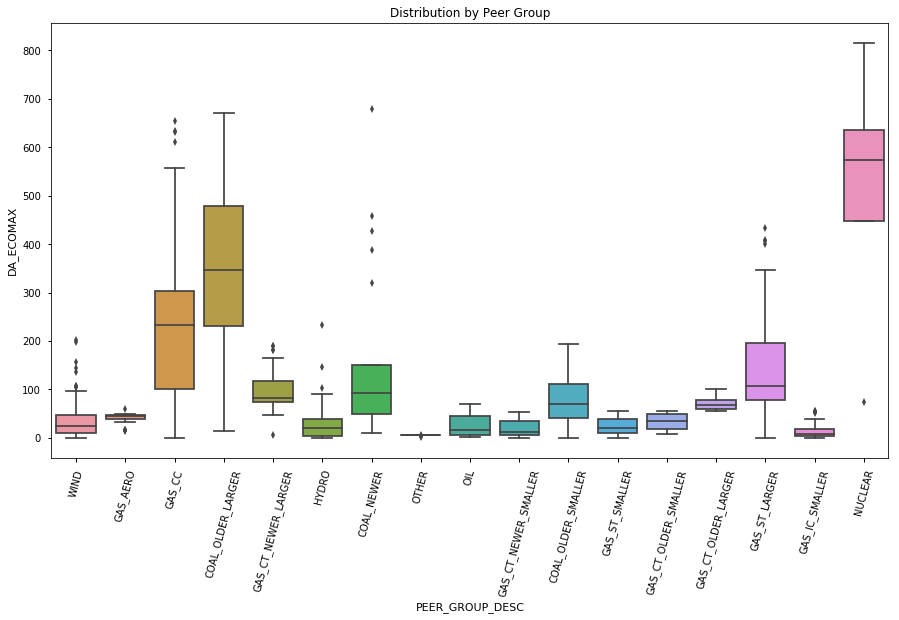

In [20]:

sns.set_context('notebook',font_scale=1)
def BOX_PLOT_PARAMETERS(Parameter, ByGroup, data):
    plt.figure(figsize=(15,8))
    plt.xticks(rotation=75)
    plt.xlabel('ByGroup')
    plt.ylabel('Parameter')
    plt.title('Distribution by Peer Group')
    sns.boxplot(x=ByGroup, y=Parameter, data=MONTHLY)  
    

BOX_PLOT_PARAMETERS(MONTHLY['DA_ECOMAX'],MONTHLY['PEER_GROUP_DESC'], MONTHLY)

In [5]:


x_data = MONTHLY['PEER_GROUP_DESC'].unique()

WIND=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='WIND']['DA_ECOMAX']
NA=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='']['DA_ECOMAX']
GAS_AERO=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_AERO']['DA_ECOMAX']
GAS_CC=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_CC']['DA_ECOMAX']
GAS_CT_NEWER_LARGER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_CT_NEWER_LARGER']['DA_ECOMAX']
GAS_CT_NEWER_SMALLER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_CT_NEWER_SMALLER']['DA_ECOMAX']
GAS_CT_OLDER_LARGER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_CT_OLDER_LARGER']['DA_ECOMAX']
GAS_CT_OLDER_SMALLER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_CT_OLDER_SMALLER']['DA_ECOMAX']
GAS_ST_LARGER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_ST_LARGER']['DA_ECOMAX']
GAS_ST_SMALLER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_ST_SMALLER']['DA_ECOMAX']
GAS_IC_SMALLER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='GAS_IC_SMALLER']['DA_ECOMAX']
COAL_OLDER_LARGER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='COAL_OLDER_LARGER']['DA_ECOMAX']
COAL_OLDER_SMALLER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='COAL_OLDER_SMALLER']['DA_ECOMAX']
COAL_NEWER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='COAL_NEWER']['DA_ECOMAX']
NUCLEAR=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='NUCLEAR']['DA_ECOMAX']
OIL=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='OIL']['DA_ECOMAX']
HYDRO=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='HYDRO']['DA_ECOMAX']
OTHER=MONTHLY[MONTHLY['PEER_GROUP_DESC']=='OTHER']['DA_ECOMAX']

y_data=(WIND, NA, GAS_AERO, GAS_CC, COAL_OLDER_LARGER, GAS_CT_NEWER_LARGER, HYDRO, COAL_NEWER, OTHER, OIL,
GAS_CT_NEWER_SMALLER, COAL_OLDER_SMALLER, GAS_ST_SMALLER,GAS_CT_OLDER_SMALLER, GAS_CT_OLDER_LARGER, GAS_ST_LARGER,
GAS_IC_SMALLER, NUCLEAR)

#I find my colors at https://www.hexcolortool.com/

colors = ['rgba(145,48,48,1)','rgba(180,60,60,1)','rgba(180,96,60,1)','rgba(194,90,46,1)','rgba(200,138,45,1)','rgba(214,180,41,1)',
'rgba(219,210,41,1)','rgba(187,213,42,1)','rgba(146,202,43,1)','rgba(92,183,56,1)','rgba(56,183,149,1)','rgba(55,152,164,1)',
'rgba(46,106,158,1)','rgba(48,66,145,1)','rgba(75,45,159,1)','rgba(132,49,150,1)','rgba(150,49,113,1)']


traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='outlier',
           # jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))


layout = go.Layout(
    title='DA Ecomax Time Distribution by Peer Group',
    yaxis=dict(
        title='Ecomax',
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=30,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

DA_ECOMAX_BOXPLOT = go.Figure(data=traces, layout=layout)
py.iplot(DA_ECOMAX_BOXPLOT)


IndentationError: expected an indented block (<ipython-input-89-52ab7523610f>, line 3)

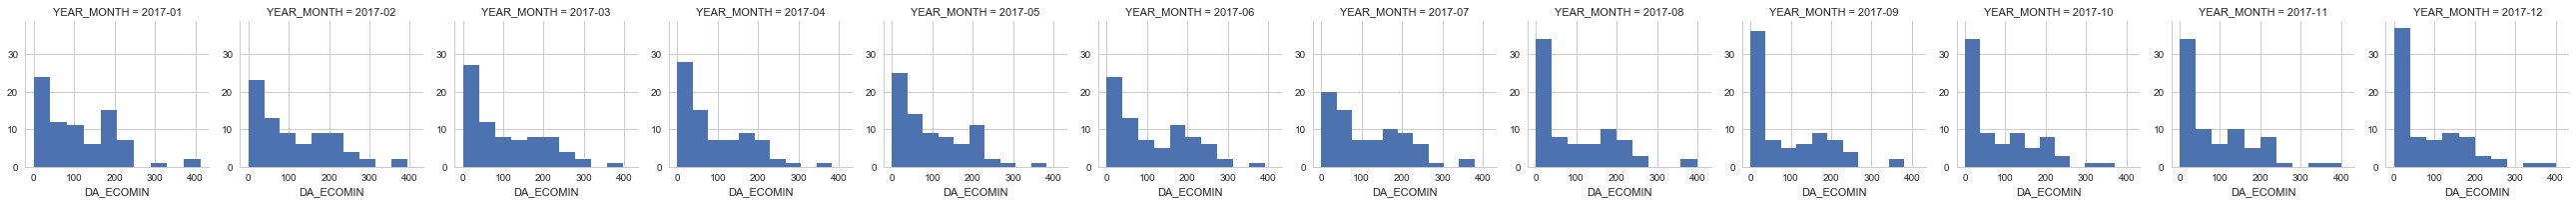

In [25]:
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

COAL=PARAMETERS[(PARAMETERS['PEER_GROUP_DESC']=='COAL_OLDER_SMALLER') | 
                           (PARAMETERS['PEER_GROUP_DESC']=='COAL_OLDER_LARGER')]

#newdf = df[(df['col1']>2) & (df['col2']==444)]
#SPP_UPLIFT_MONTHLY[SPP_UPLIFT_MONTHLY['TOTAL_UPLIFT']>=SPP_UPLIFT_MONTHLY['TOTAL_UPLIFT'].max()]


# Draw a nested boxplot to show average peer group values over time

g = sns.FacetGrid(COAL, col="YEAR_MONTH")
g = g.map(plt.hist, "DA_ECOMIN")

